# Model Prototype

We will build and evaluate a linear regression model with the preprocessed data prepare previously.

## 1. Dataset loading

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# to handle datasets
import pandas as pd
import numpy as np
import pickle
from time import time

# for plotting
import matplotlib.pyplot as plt

# to build the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy.stats import pearsonr

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [19]:
def get_dataset():
    df = pd.read_csv('../data/completion_rate.csv')
    df['completion_ratio'] = df['submissions']/df['views']
    selected_columns = list(df.columns)
    selected_columns.pop(selected_columns.index('form_id'))
    selected_columns.pop(selected_columns.index('views'))
    selected_columns.pop(selected_columns.index('submissions'))
    df = df.loc[:,selected_columns]
    target_name = 'completion_ratio'
    features = list(df.columns)
    _  = features.pop(features.index(target_name))
    df = df.sample(frac=0.5)
    X_train, X_test, y_train, y_test = train_test_split(
        df,
        df['completion_ratio'],
        test_size=0.3,
        random_state=7,
    )  

    X_train = X_train.copy()
    X_test = X_test.copy()
    return X_train, X_test

In [48]:
def evaluate_model(model):
    X_train, X_test = get_dataset()
    y_train = X_train.loc[:,'completion_ratio'].copy()
    y_test = X_test.loc[:,'completion_ratio'].copy()
    features = [ col for col in X_train.columns if col != 'completion_ratio']
    X_train = X_train.loc[:,features].copy()
    X_test = X_test.loc[:,features].copy()

    # Improvements:
    # MinMaxScaler
    # Sample less 
    # ko-pick some features
    # ->More complex algorithm : random Forrest
    # More complex algorithm : Knn-regression

    start = time()

    print("Model ", model.__class__.__name__,"\n")
    model.fit(X_train, y_train)
    evaluation(model, X_train, y_train, X_test, y_test)
    end = time()
    print("time: ", round(end-start),"s")
    
    return model

## 3. Train & evaluate all the models



In [49]:
def evaluation(lin_model, X_train, y_train, X_test, y_test):
    
    
    pred = lin_model.predict(X_train)

    
    # determine mse and rmse
    print('train mse: {}'.format(round(
        mean_squared_error(y_train, pred),5)))
    print('train rmse: {}'.format(round(
        sqrt(mean_squared_error(y_train, pred)),5)))
    print('train r2: {}'.format(
        r2_score(y_train, pred)))
    print()

    # make predictions for test set
    y_pred = lin_model.predict(X_test)
    y_pred = y_pred
    if isinstance(y_test,type(np.array([0,0]))):
        pass
    else:
        y_test = y_test.to_numpy()

    # determine mse and rmse
    print('test mse: {}'.format(round(
        mean_squared_error(y_test, y_pred),5)))
    print('test rmse: {}'.format(round(
        sqrt(mean_squared_error(y_test, y_pred)),5)))
    print('test r2: {}'.format(
        r2_score(y_test, y_pred)))
    print()

    print('Average completion ratio train: ', round(y_train.median(),5))
    print('Average completion ratio test: ', round(pd.DataFrame(y_test).median(),5))
    print('Average completion ratio test: ', round(pd.DataFrame(y_test).mean(),5))
    print('Average completion ratio pred: ', round(pd.DataFrame(y_pred).median(),5))
    print('Average completion ratio pred: ', round(pd.DataFrame(y_pred).mean(),5))
    
    # let's evaluate our predictions respect to the real sale price
 
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
    ax1.scatter(y_train, pred)
    ax1.set_xlabel('True Ratio')
    ax1.set_ylabel('Predicted Ratio')
    ax1.set_title('Evaluation of Predictions on training')
    r = round(r2_score(y_train, pred),3)
    ax1.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--k')
    ax1.text(min(y_train) + 0.05*(max(y_train) - min(pred)),min(pred) + 0.9*(max(pred) - min(pred)), "r2={}".format(r))

    ax2.scatter(y_test, y_pred)
    ax2.set_xlabel('True Ratio')
    ax2.set_ylabel('Predicted Ratio')
    ax2.set_title('Evaluation of Predictions on test')
    r = round(r2_score(y_test, y_pred),3)
    ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k')
    ax2.text(min(y_test) + 0.05*(max(y_test) - min(y_pred)),min(y_pred) + 0.9*(max(y_pred) - min(y_pred)), "r2={}".format(r))
    plt.show()

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(15,6))
    pd.DataFrame(y_pred).hist(bins=30,ax=ax1)
    ax1.set_ylabel('counts')
    ax1.set_title('y_pred')
    
    pd.DataFrame(y_test).hist(bins=30, ax=ax2)
    ax2.set_ylabel('counts')
    ax2.set_title('y_test')
    
    errors = y_test - y_pred
    pd.DataFrame(errors).hist(bins=30, ax=ax3)
    ax3.set_title('Residuals')
    
    
    return r2_score(y_test, y_pred)

In [29]:
def evaluation_fast(lin_model, X_train, y_train, X_test, y_test):
    
    
    pred = lin_model.predict(X_train)

    
    # determine mse and rmse
    print('train mse: {}'.format(round(
        mean_squared_error(y_train, pred),5)))
    print('train rmse: {}'.format(round(
        sqrt(mean_squared_error(y_train, pred)),5)))
    print('train r2: {}'.format(
        r2_score(y_train, pred)))
    
    # make predictions for test set
    y_pred = lin_model.predict(X_test)

    # determine mse and rmse
    print('test mse: {}'.format(round(
        mean_squared_error(y_test, y_pred),5)))
    test_rmse = round(
        sqrt(mean_squared_error(y_test, y_pred)),5)
    print('test rmse: {}'.format(test_rmse))
    print('test r2: {}'.format(
        r2_score(y_test, y_pred)))
    print()
    
    return r2_score(y_test, y_pred)


## Fast inspection

In [83]:
models_list = pickle.load(open('../data/models_list.pkl','rb'))
print(models_list)
r2_list = []
for k in models_list:
    if k.find('train')>-1:
        k_test = k.replace('train','test')
        X_train = pd.read_csv('../data/'+k+'.csv')
        X_test = pd.read_csv('../data/'+k_test+'.csv')
        
        
        y_train = X_train.loc[:,'completion_ratio'].copy()
        y_test = X_test.loc[:,'completion_ratio'].copy()
        features = [ col for col in X_train.columns if col != 'completion_ratio']
        X_train = X_train.loc[:,features].copy()
        X_test = X_test.loc[:,features].copy()
        
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        y_train= scaler.fit_transform(pd.DataFrame(y_train))
        y_test = scaler.transform(pd.DataFrame(y_test))
        
        print("Model ",k)
        
        lasso_model = Lasso(alpha=0.0001, random_state=0)
        ridge_regr = Ridge(alpha=1.0)
        
        print(lasso_model.__class__.__name__)
        lasso_model.fit(X_train, y_train)
        test_r2 = evaluation_fast(lasso_model, X_train, y_train, X_test, y_test)
        r2_list.append((k+"_"+lasso_model.__class__.__name__,test_r2))
        
        print(ridge_regr.__class__.__name__)
        ridge_regr.fit(X_train, y_train)
        test_r2 = evaluation_fast(ridge_regr, X_train, y_train, X_test, y_test)
        r2_list.append((k+"_"+ridge_regr.__class__.__name__,test_r2))
        
     

['X_train', 'X_test', 'X_train_dr', 'X_test_dr', 'X_train_qt', 'X_test_qt', 'X_train_dr_qt', 'X_test_dr_qt', 'X_train_nc', 'X_test_nc', 'X_train_dr_nc', 'X_test_dr_nc', 'X_train_qt_nc', 'X_test_qt_nc', 'X_train_dr_qt_nc', 'X_test_dr_qt_nc', 'X_train_fs', 'X_test_fs', 'X_train_dr_fs', 'X_test_dr_fs', 'X_train_qt_fs', 'X_test_qt_fs', 'X_train_dr_qt_fs', 'X_test_dr_qt_fs', 'X_train_nc_fs', 'X_test_nc_fs', 'X_train_dr_nc_fs', 'X_test_dr_nc_fs', 'X_train_qt_nc_fs', 'X_test_qt_nc_fs', 'X_train_dr_qt_nc_fs', 'X_test_dr_qt_nc_fs']
Model  X_train
Lasso
train mse: 0.0475
train rmse: 0.21795
train r2: 0.05004094256826275
test mse: 0.04736
test rmse: 0.21763
test r2: 0.04907321033568002

Ridge
train mse: 0.04684
train rmse: 0.21644
train r2: 0.06316849937081126
test mse: 0.04659
test rmse: 0.21586
test r2: 0.06448485638460999

Model  X_train_dr
Lasso
train mse: 0.0475
train rmse: 0.21795
train r2: 0.05004094256826275
test mse: 0.04736
test rmse: 0.21763
test r2: 0.04907321033568002

Ridge
train ms

In [85]:
   
r2_list.sort(key=lambda x: x[1])
for r2 in r2_list:
    print(r2)

('X_train_qt_fs_Lasso', 0.026107912895714458)
('X_train_dr_qt_fs_Lasso', 0.026107912895714458)
('X_train_qt_Lasso', 0.026144254041594484)
('X_train_dr_qt_Lasso', 0.026144254041594484)
('X_train_qt_nc_Lasso', 0.026144254041594484)
('X_train_dr_qt_nc_Lasso', 0.026144254041594484)
('X_train_qt_nc_fs_Lasso', 0.026144254041594484)
('X_train_dr_qt_nc_fs_Lasso', 0.026144254041594484)
('X_train_nc_Lasso', 0.04820467918214555)
('X_train_dr_nc_Lasso', 0.04820467918214555)
('X_train_nc_fs_Lasso', 0.04820467918214555)
('X_train_dr_nc_fs_Lasso', 0.04820467918214555)
('X_train_fs_Lasso', 0.04906744423807807)
('X_train_dr_fs_Lasso', 0.04906744423807807)
('X_train_Lasso', 0.04907321033568002)
('X_train_dr_Lasso', 0.04907321033568002)
('X_train_qt_nc_Ridge', 0.057609513435376014)
('X_train_dr_qt_nc_Ridge', 0.057609513435376014)
('X_train_qt_nc_fs_Ridge', 0.057609513435376014)
('X_train_dr_qt_nc_fs_Ridge', 0.057609513435376014)
('X_train_qt_Ridge', 0.05784538106114012)
('X_train_dr_qt_Ridge', 0.05784538

## Detailed evaluation

['X_train', 'X_test', 'X_train_dr', 'X_test_dr', 'X_train_qt', 'X_test_qt', 'X_train_dr_qt', 'X_test_dr_qt', 'X_train_nc', 'X_test_nc', 'X_train_dr_nc', 'X_test_dr_nc', 'X_train_qt_nc', 'X_test_qt_nc', 'X_train_dr_qt_nc', 'X_test_dr_qt_nc', 'X_train_fs', 'X_test_fs', 'X_train_dr_fs', 'X_test_dr_fs', 'X_train_qt_fs', 'X_test_qt_fs', 'X_train_dr_qt_fs', 'X_test_dr_qt_fs', 'X_train_nc_fs', 'X_test_nc_fs', 'X_train_dr_nc_fs', 'X_test_dr_nc_fs', 'X_train_qt_nc_fs', 'X_test_qt_nc_fs', 'X_train_dr_qt_nc_fs', 'X_test_dr_qt_nc_fs']
Model  X_train
Lasso
train mse: 0.04686
train rmse: 0.21647
train r2: 0.06285151851154647

test mse: 0.0466
test rmse: 0.21588
test r2: 0.06429820034634404

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52386
dtype: float64
Average completion ratio pred:  0    0.51535
dtype: float64


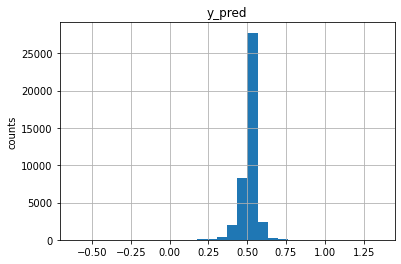

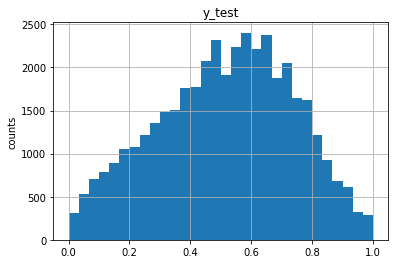

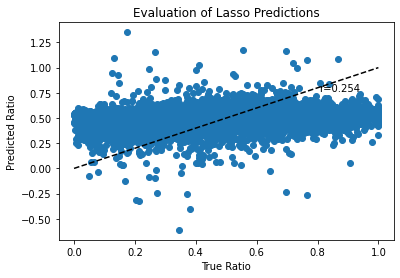

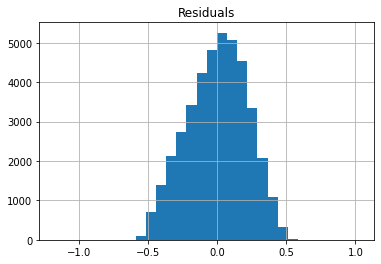

Ridge
train mse: 0.04684
train rmse: 0.21642
train r2: 0.06331720082003234

test mse: 0.0466
test rmse: 0.21586
test r2: 0.06442637161549147

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52392
dtype: float64
Average completion ratio pred:  0    0.5154
dtype: float64


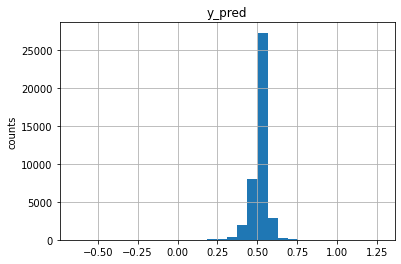

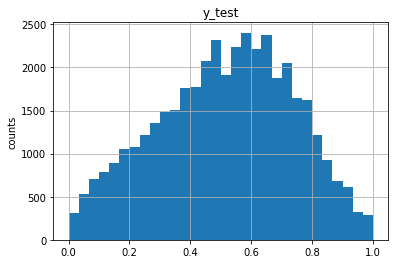

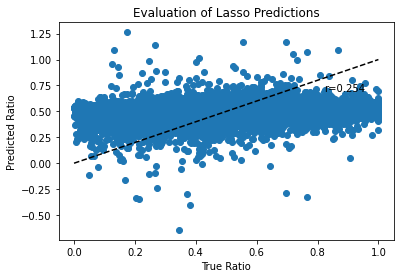

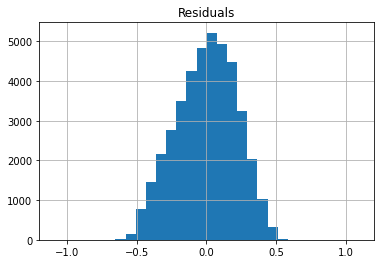

Model  X_train_dr
Lasso
train mse: 0.04686
train rmse: 0.21647
train r2: 0.06285151851154647

test mse: 0.0466
test rmse: 0.21588
test r2: 0.06429820034634404

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52386
dtype: float64
Average completion ratio pred:  0    0.51535
dtype: float64


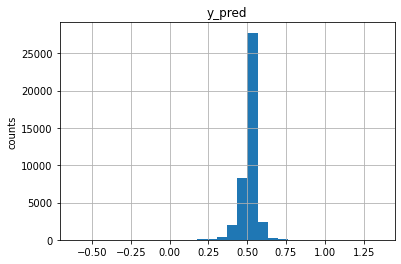

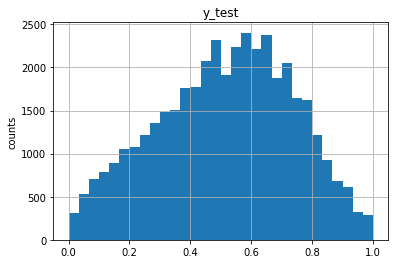

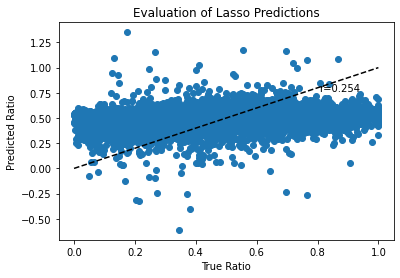

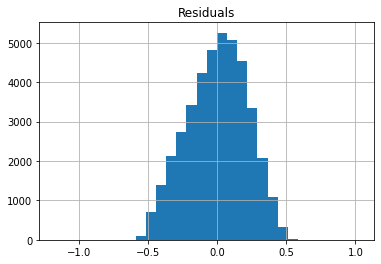

Ridge
train mse: 0.04684
train rmse: 0.21642
train r2: 0.06331720082003234

test mse: 0.0466
test rmse: 0.21586
test r2: 0.06442637161549147

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52392
dtype: float64
Average completion ratio pred:  0    0.5154
dtype: float64


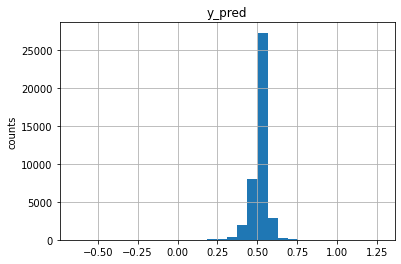

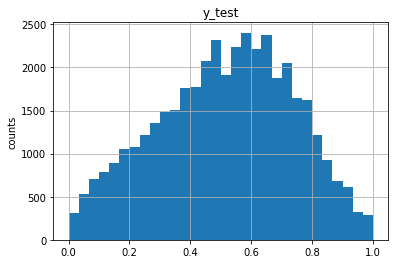

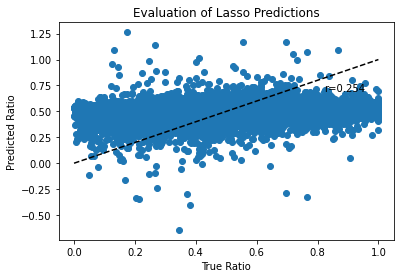

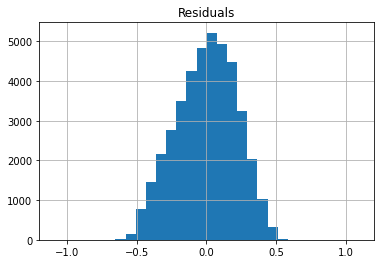

Model  X_train_qt
Lasso


/media/disk/home/pau/Projectes/typeform_test/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2008.4254677158897, tolerance: 40.626163069940084
  positive)


train mse: 1.03186
train rmse: 1.0158
train r2: 0.057038927975292864

test mse: 1.02644
test rmse: 1.01313
test r2: 0.05772715988577937

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04705
dtype: float64
Average completion ratio pred:  0    0.00785
dtype: float64


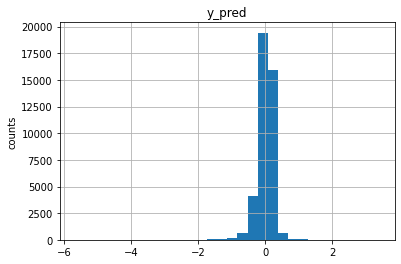

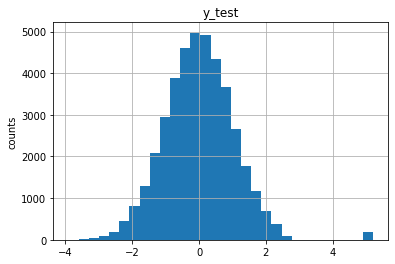

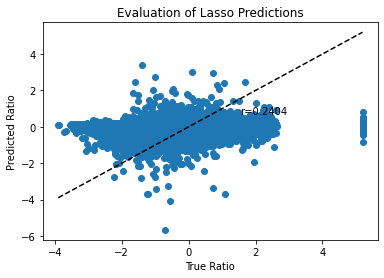

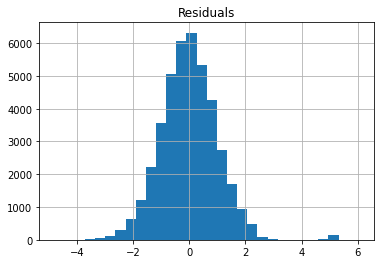

Ridge
train mse: 1.03177
train rmse: 1.01576
train r2: 0.05711707514762476

test mse: 1.02649
test rmse: 1.01316
test r2: 0.05767743025111871

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04719
dtype: float64
Average completion ratio pred:  0    0.008
dtype: float64


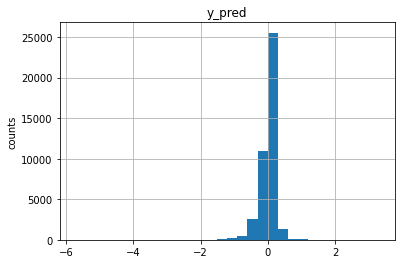

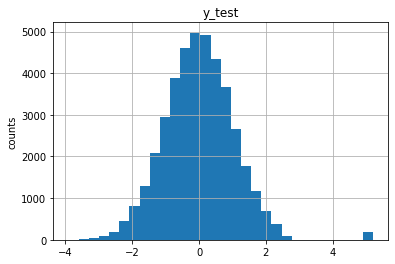

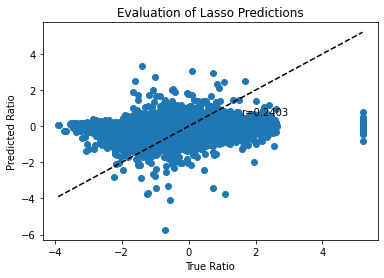

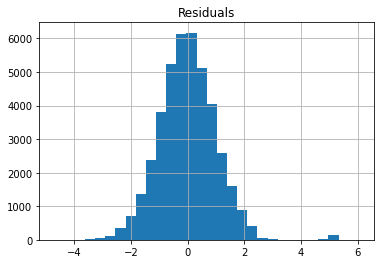

Model  X_train_dr_qt
Lasso


/media/disk/home/pau/Projectes/typeform_test/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2008.4254677158897, tolerance: 40.626163069940084
  positive)


train mse: 1.03186
train rmse: 1.0158
train r2: 0.057038927975292864

test mse: 1.02644
test rmse: 1.01313
test r2: 0.05772715988577937

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04705
dtype: float64
Average completion ratio pred:  0    0.00785
dtype: float64


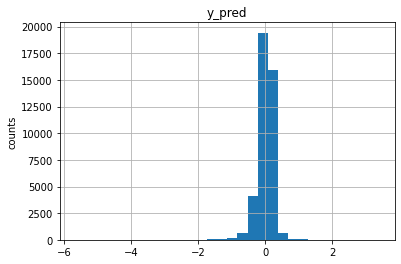

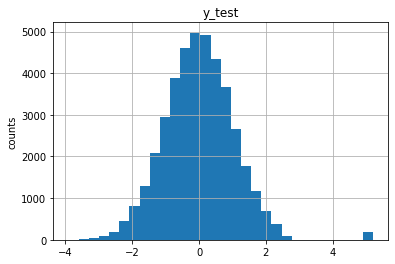

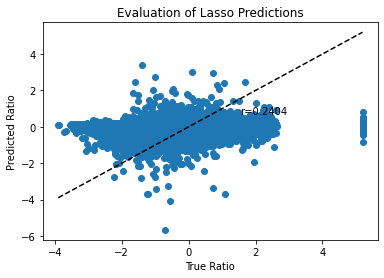

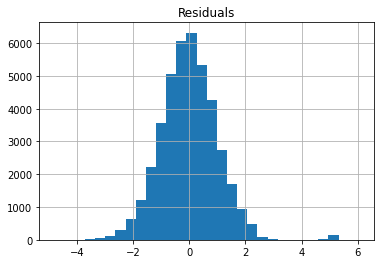

Ridge
train mse: 1.03177
train rmse: 1.01576
train r2: 0.05711707514762476

test mse: 1.02649
test rmse: 1.01316
test r2: 0.05767743025111871

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04719
dtype: float64
Average completion ratio pred:  0    0.008
dtype: float64


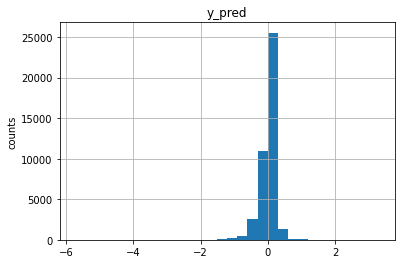

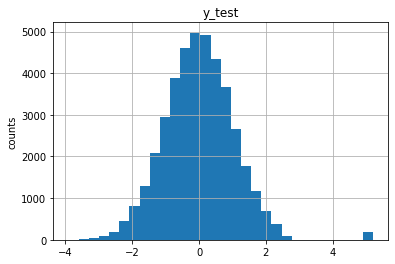

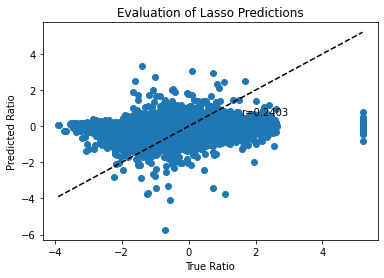

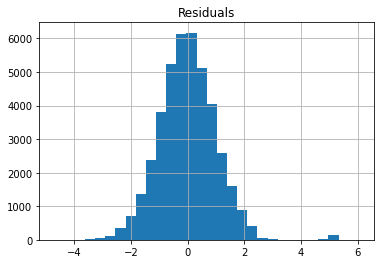

Model  X_train_nc
Lasso
train mse: 0.04687
train rmse: 0.21649
train r2: 0.06269753306778636

test mse: 0.0466
test rmse: 0.21587
test r2: 0.06435902356326895

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52377
dtype: float64
Average completion ratio pred:  0    0.5154
dtype: float64


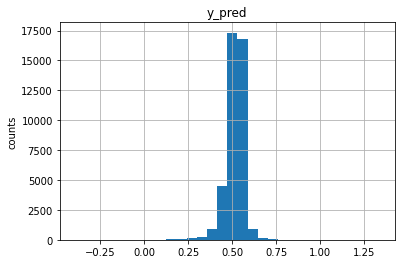

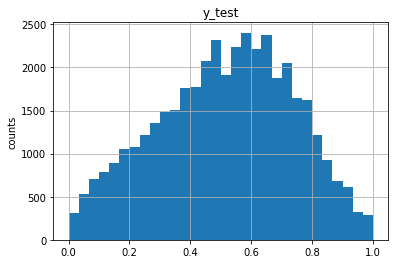

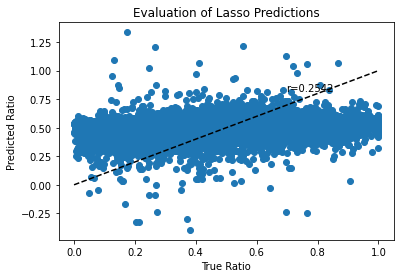

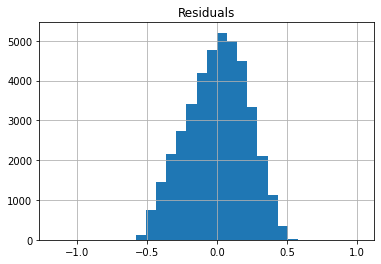

Ridge
train mse: 0.04685
train rmse: 0.21645
train r2: 0.06307533055891557

test mse: 0.04659
test rmse: 0.21585
test r2: 0.06453665370197625

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52383
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


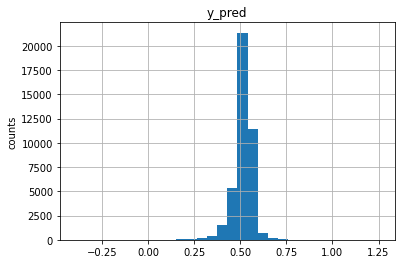

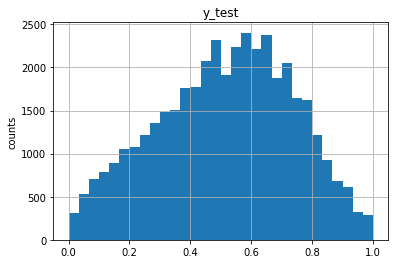

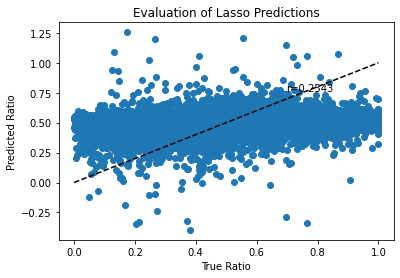

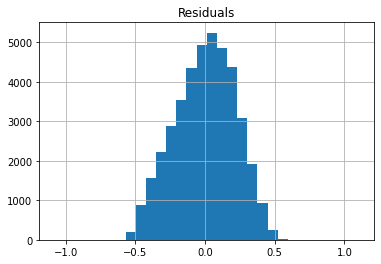

Model  X_train_dr_nc
Lasso
train mse: 0.04687
train rmse: 0.21649
train r2: 0.06269753306778636

test mse: 0.0466
test rmse: 0.21587
test r2: 0.06435902356326895

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52377
dtype: float64
Average completion ratio pred:  0    0.5154
dtype: float64


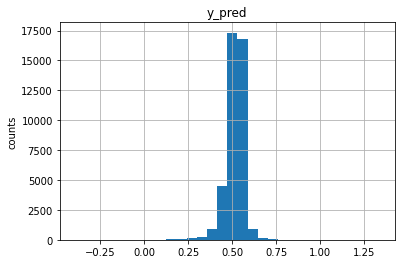

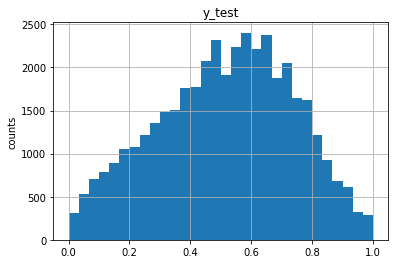

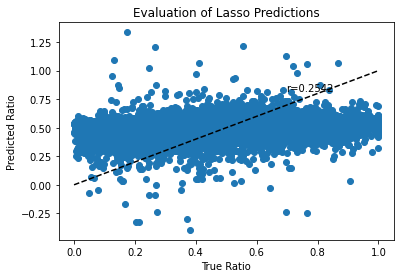

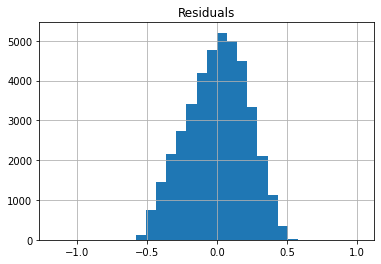

Ridge
train mse: 0.04685
train rmse: 0.21645
train r2: 0.06307533055891557

test mse: 0.04659
test rmse: 0.21585
test r2: 0.06453665370197625

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52383
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


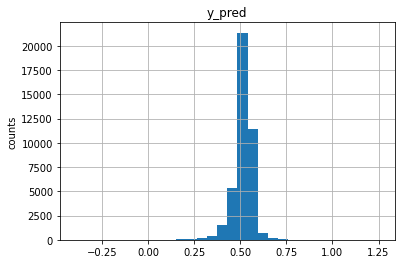

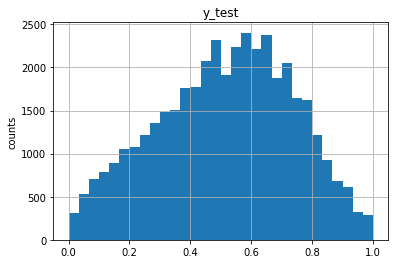

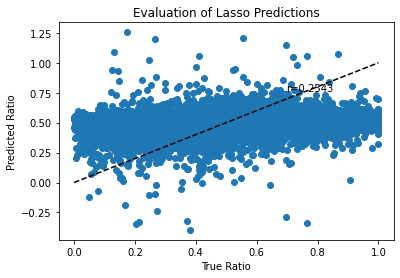

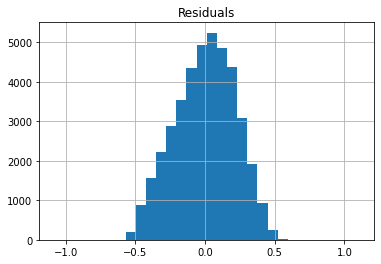

Model  X_train_qt_nc
Lasso
train mse: 1.03213
train rmse: 1.01594
train r2: 0.05679304357086146

test mse: 1.02627
test rmse: 1.01305
test r2: 0.057882841608252855

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04662
dtype: float64
Average completion ratio pred:  0    0.00807
dtype: float64


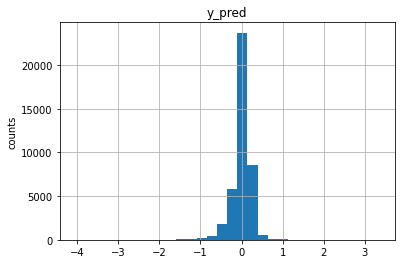

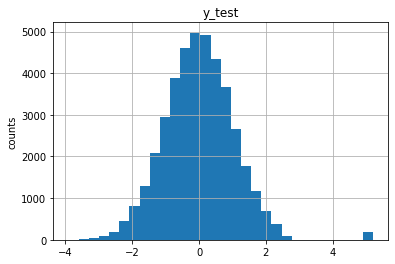

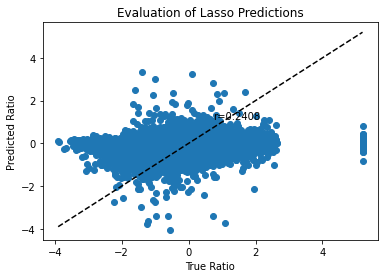

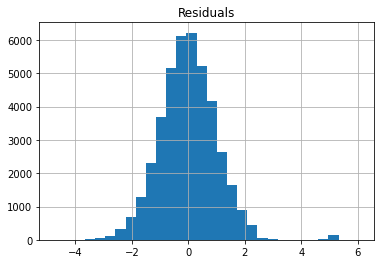

Ridge
train mse: 1.03211
train rmse: 1.01593
train r2: 0.05681113354170697

test mse: 1.02631
test rmse: 1.01307
test r2: 0.057842225324631014

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04671
dtype: float64
Average completion ratio pred:  0    0.0081
dtype: float64


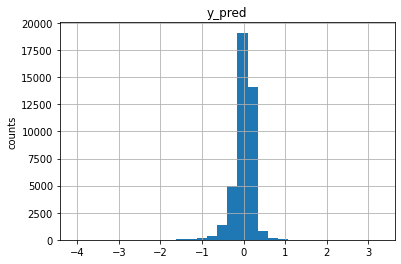

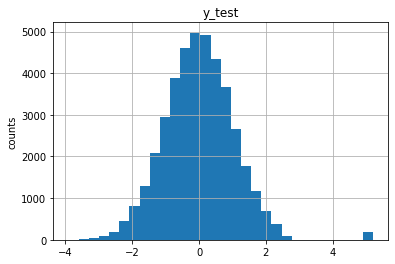

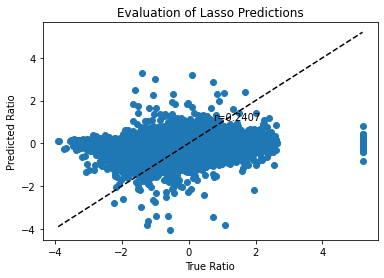

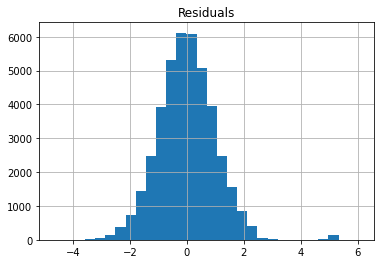

Model  X_train_dr_qt_nc
Lasso
train mse: 1.03213
train rmse: 1.01594
train r2: 0.05679304357086146

test mse: 1.02627
test rmse: 1.01305
test r2: 0.057882841608252855

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04662
dtype: float64
Average completion ratio pred:  0    0.00807
dtype: float64


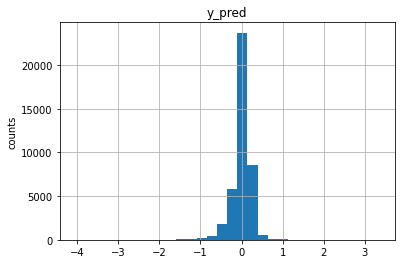

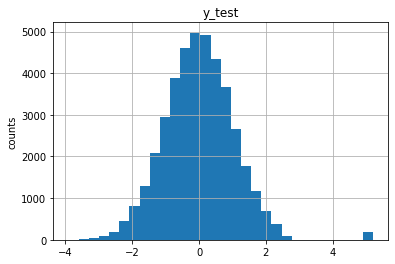

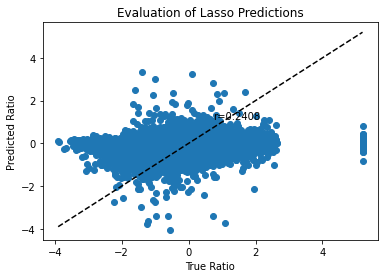

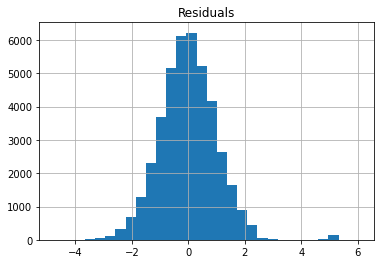

Ridge
train mse: 1.03211
train rmse: 1.01593
train r2: 0.05681113354170697

test mse: 1.02631
test rmse: 1.01307
test r2: 0.057842225324631014

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04671
dtype: float64
Average completion ratio pred:  0    0.0081
dtype: float64


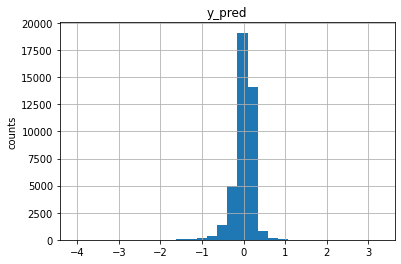

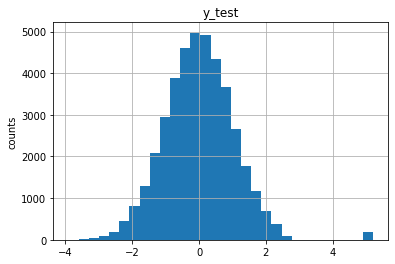

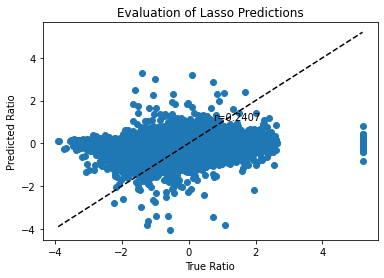

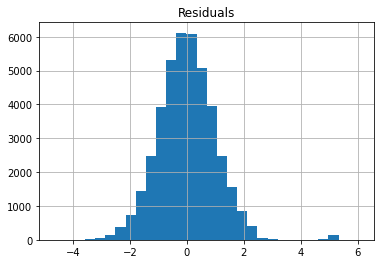

Model  X_train_fs
Lasso
train mse: 0.04686
train rmse: 0.21647
train r2: 0.06284984356010481

test mse: 0.0466
test rmse: 0.21588
test r2: 0.06430242662118502

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52388
dtype: float64
Average completion ratio pred:  0    0.51535
dtype: float64


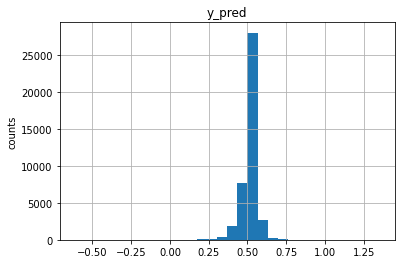

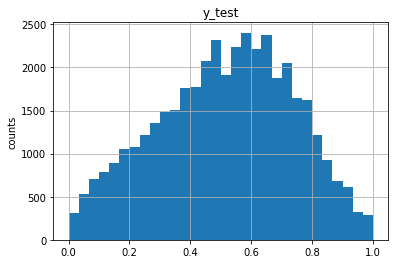

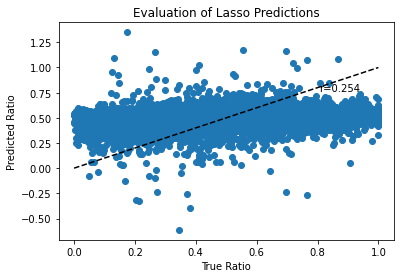

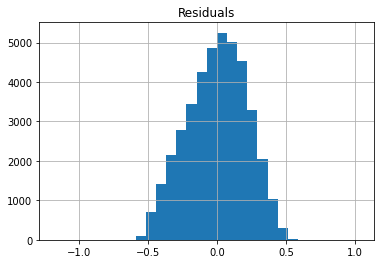

Ridge
train mse: 0.04684
train rmse: 0.21643
train r2: 0.06324375795672788

test mse: 0.0466
test rmse: 0.21587
test r2: 0.0644117559810774

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52389
dtype: float64
Average completion ratio pred:  0    0.51537
dtype: float64


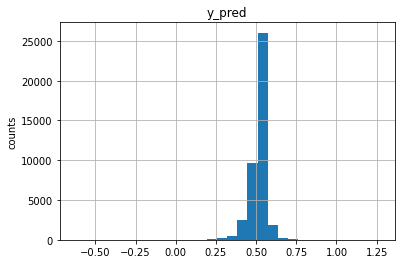

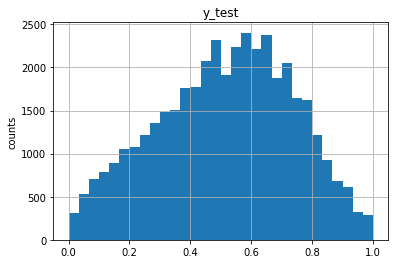

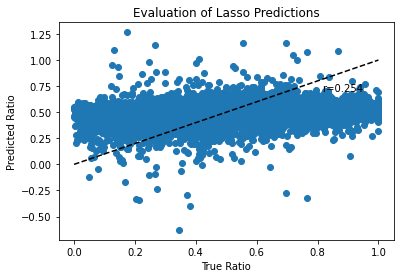

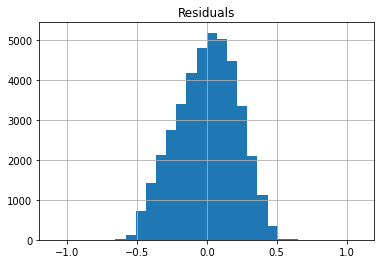

Model  X_train_dr_fs
Lasso
train mse: 0.04686
train rmse: 0.21647
train r2: 0.06284984356010481

test mse: 0.0466
test rmse: 0.21588
test r2: 0.06430242662118502

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52388
dtype: float64
Average completion ratio pred:  0    0.51535
dtype: float64


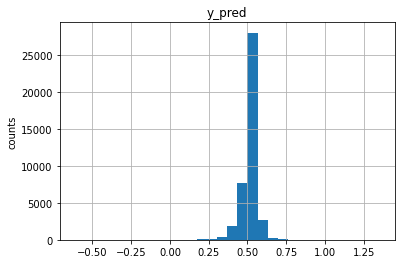

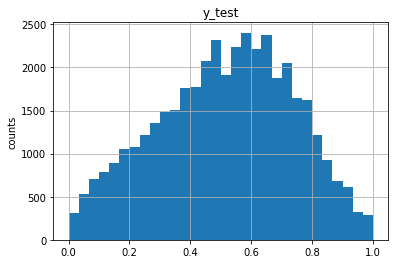

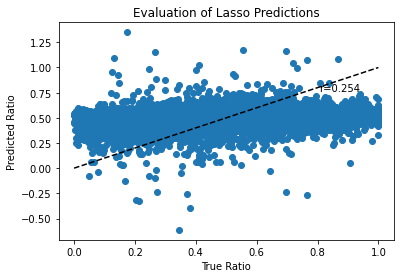

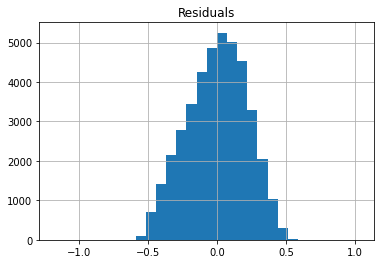

Ridge
train mse: 0.04684
train rmse: 0.21643
train r2: 0.06324375795672788

test mse: 0.0466
test rmse: 0.21587
test r2: 0.0644117559810774

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52389
dtype: float64
Average completion ratio pred:  0    0.51537
dtype: float64


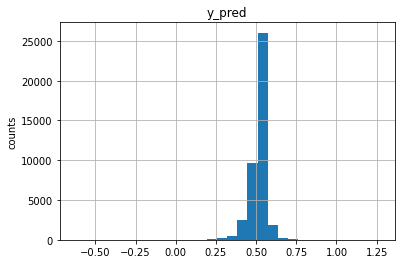

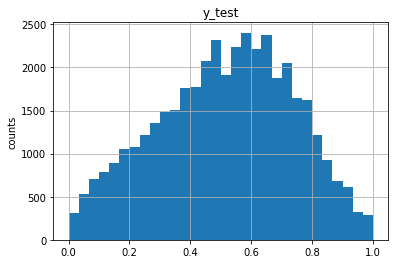

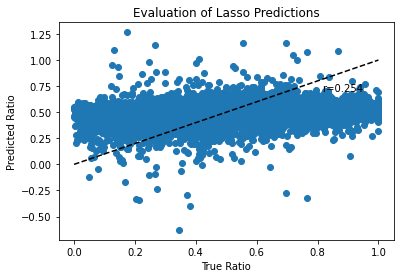

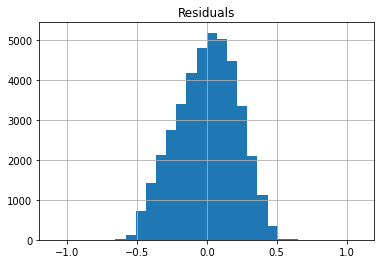

Model  X_train_qt_fs
Lasso


/media/disk/home/pau/Projectes/typeform_test/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2007.9130513175041, tolerance: 40.626163069940084
  positive)


train mse: 1.03186
train rmse: 1.0158
train r2: 0.05703892938937816

test mse: 1.02644
test rmse: 1.01313
test r2: 0.057727160619509554

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04705
dtype: float64
Average completion ratio pred:  0    0.00785
dtype: float64


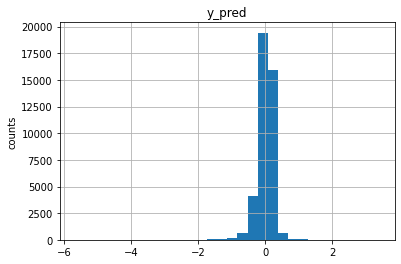

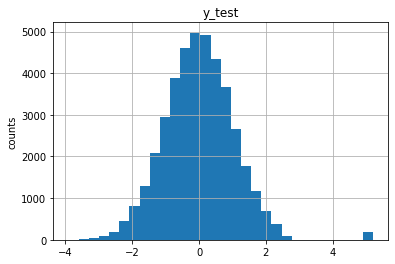

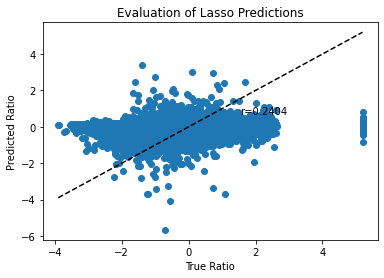

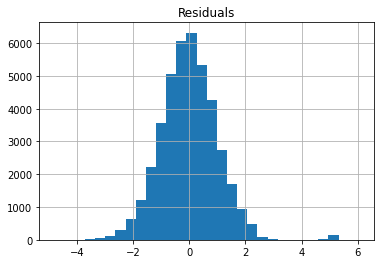

Ridge
train mse: 1.03177
train rmse: 1.01576
train r2: 0.05711455535132948

test mse: 1.0265
test rmse: 1.01316
test r2: 0.05767230510298549

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04726
dtype: float64
Average completion ratio pred:  0    0.00801
dtype: float64


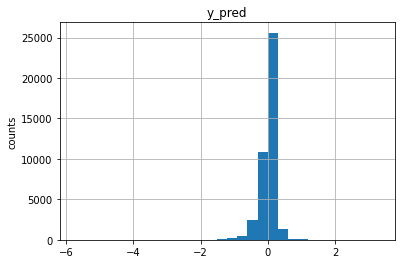

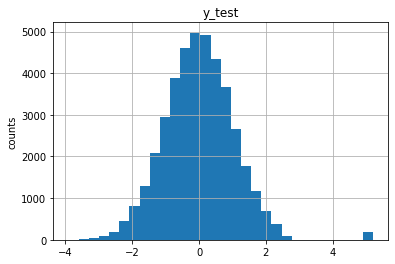

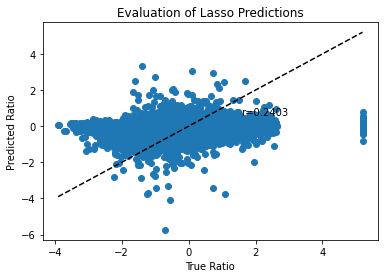

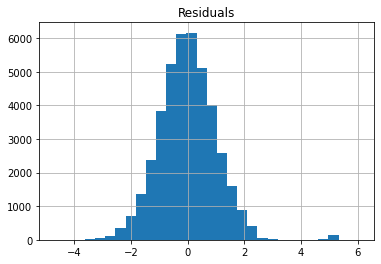

Model  X_train_dr_qt_fs
Lasso


/media/disk/home/pau/Projectes/typeform_test/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2007.9130513175041, tolerance: 40.626163069940084
  positive)


train mse: 1.03186
train rmse: 1.0158
train r2: 0.05703892938937816

test mse: 1.02644
test rmse: 1.01313
test r2: 0.057727160619509554

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04705
dtype: float64
Average completion ratio pred:  0    0.00785
dtype: float64


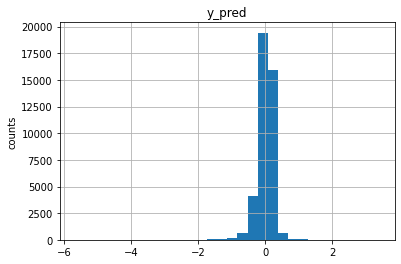

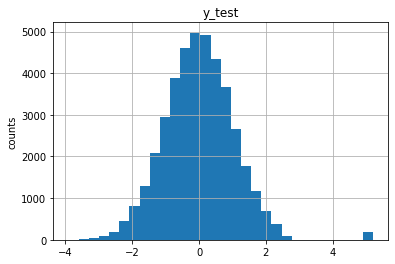

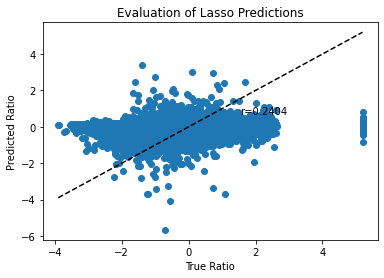

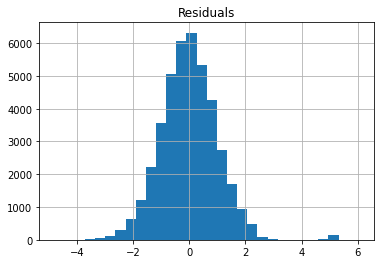

Ridge
train mse: 1.03177
train rmse: 1.01576
train r2: 0.05711455535132948

test mse: 1.0265
test rmse: 1.01316
test r2: 0.05767230510298549

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04726
dtype: float64
Average completion ratio pred:  0    0.00801
dtype: float64


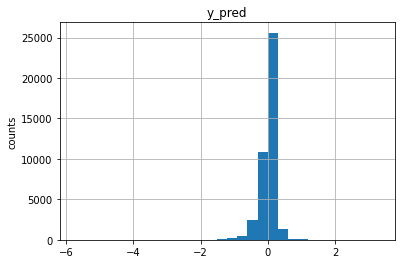

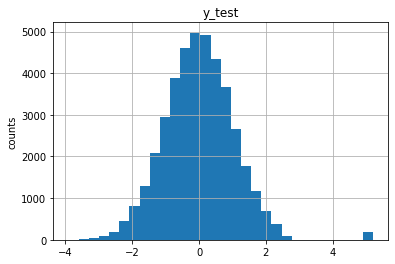

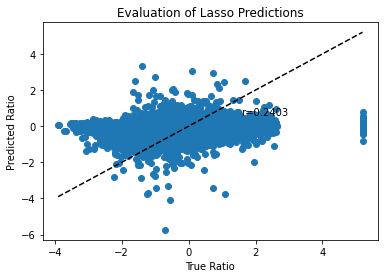

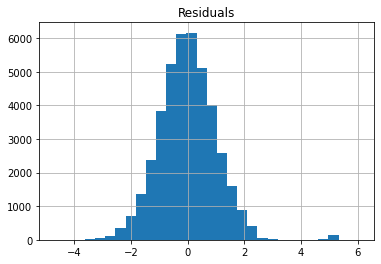

Model  X_train_nc_fs
Lasso
train mse: 0.04687
train rmse: 0.21649
train r2: 0.06269753367098319

test mse: 0.0466
test rmse: 0.21587
test r2: 0.06435902366763024

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52377
dtype: float64
Average completion ratio pred:  0    0.5154
dtype: float64


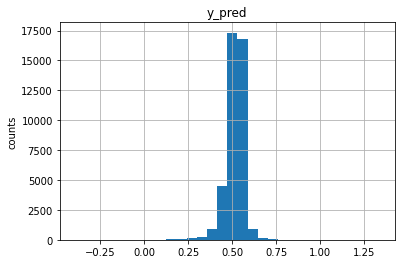

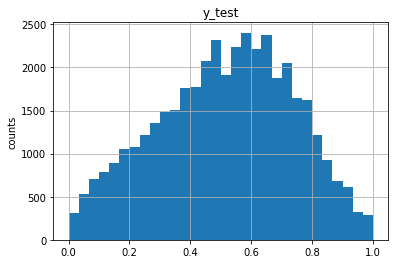

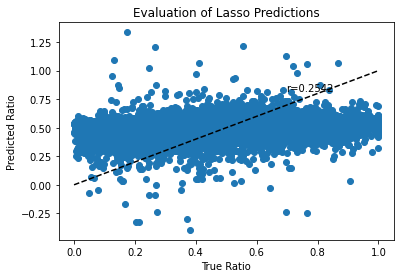

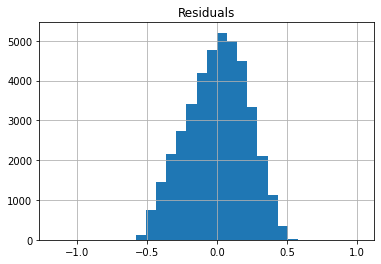

Ridge
train mse: 0.04685
train rmse: 0.21645
train r2: 0.06307517109741856

test mse: 0.04659
test rmse: 0.21585
test r2: 0.0645288822556952

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52384
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


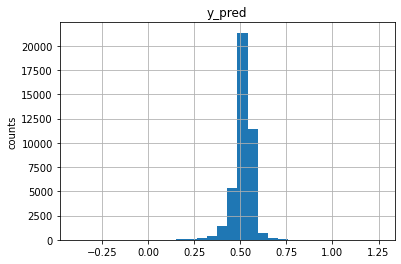

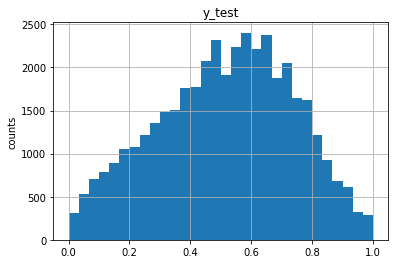

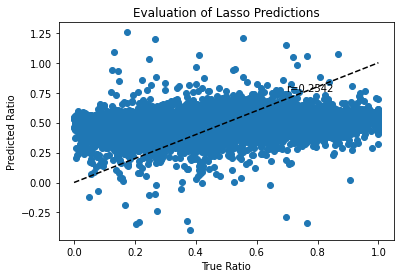

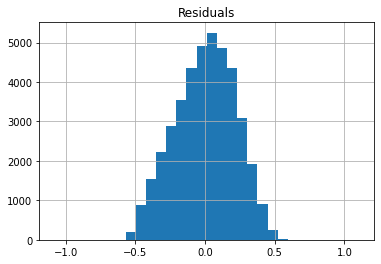

Model  X_train_dr_nc_fs
Lasso
train mse: 0.04687
train rmse: 0.21649
train r2: 0.06269753367098319

test mse: 0.0466
test rmse: 0.21587
test r2: 0.06435902366763024

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52377
dtype: float64
Average completion ratio pred:  0    0.5154
dtype: float64


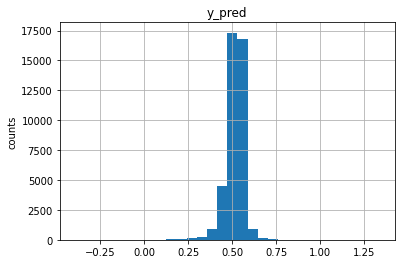

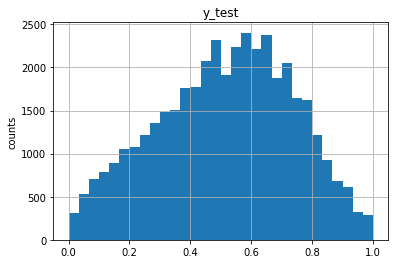

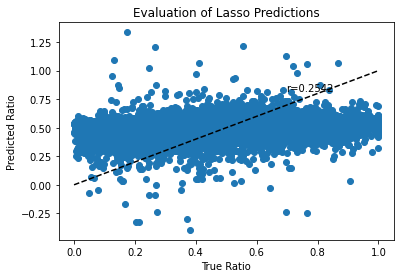

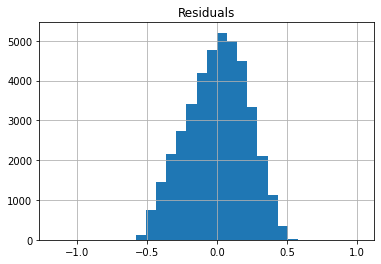

Ridge
train mse: 0.04685
train rmse: 0.21645
train r2: 0.06307517109741856

test mse: 0.04659
test rmse: 0.21585
test r2: 0.0645288822556952

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52384
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


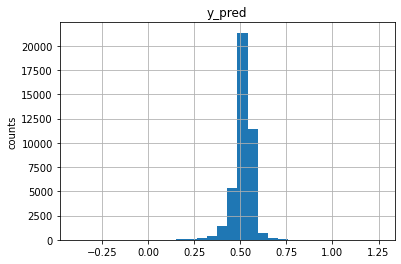

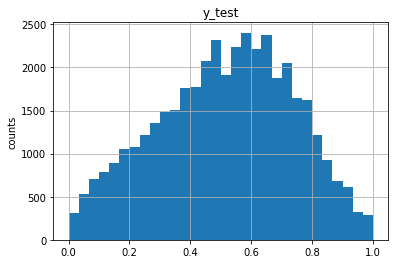

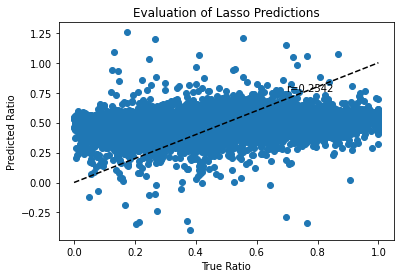

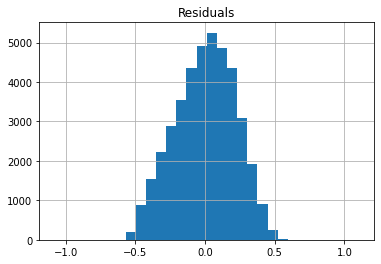

Model  X_train_qt_nc_fs
Lasso
train mse: 1.03213
train rmse: 1.01594
train r2: 0.05679304357086146

test mse: 1.02627
test rmse: 1.01305
test r2: 0.057882841608252855

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04662
dtype: float64
Average completion ratio pred:  0    0.00807
dtype: float64


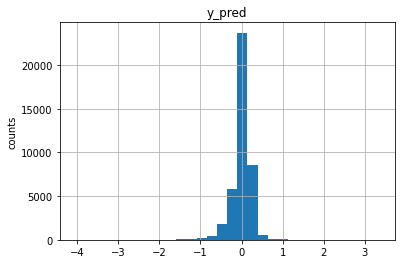

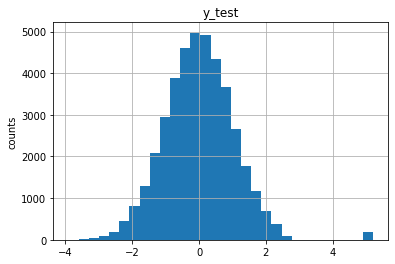

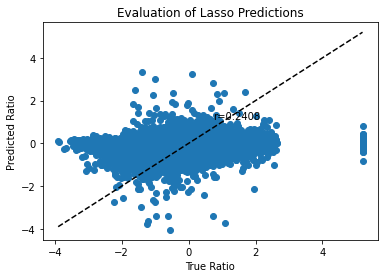

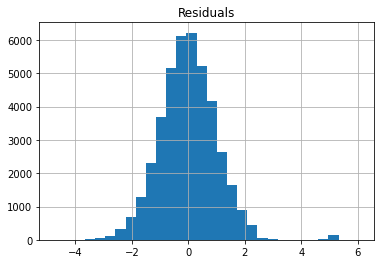

Ridge
train mse: 1.03211
train rmse: 1.01593
train r2: 0.05681113354170697

test mse: 1.02631
test rmse: 1.01307
test r2: 0.057842225324631014

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04671
dtype: float64
Average completion ratio pred:  0    0.0081
dtype: float64


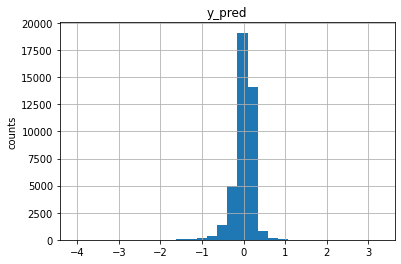

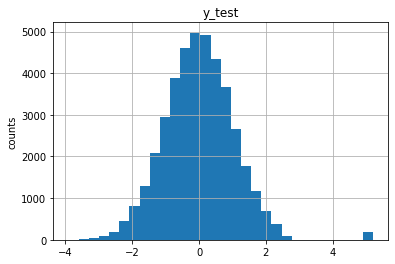

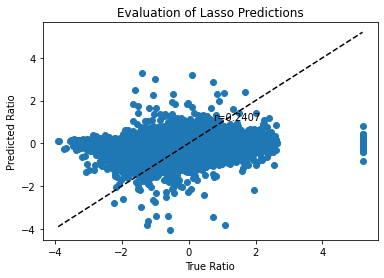

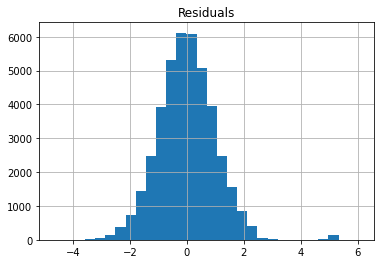

Model  X_train_dr_qt_nc_fs
Lasso
train mse: 1.03213
train rmse: 1.01594
train r2: 0.05679304357086146

test mse: 1.02627
test rmse: 1.01305
test r2: 0.057882841608252855

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04662
dtype: float64
Average completion ratio pred:  0    0.00807
dtype: float64


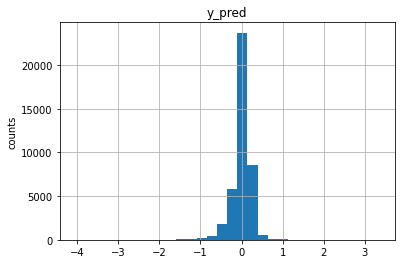

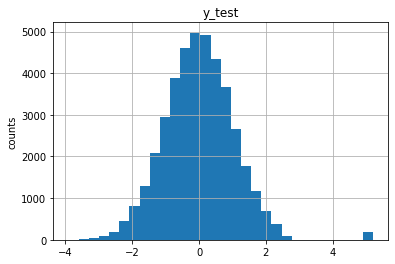

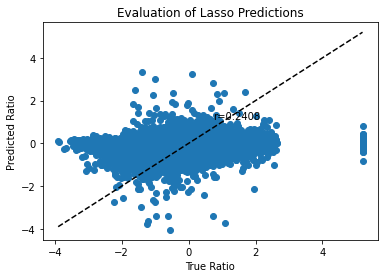

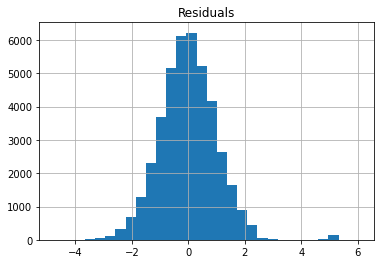

Ridge
train mse: 1.03211
train rmse: 1.01593
train r2: 0.05681113354170697

test mse: 1.02631
test rmse: 1.01307
test r2: 0.057842225324631014

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04671
dtype: float64
Average completion ratio pred:  0    0.0081
dtype: float64


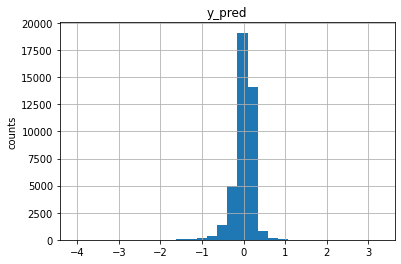

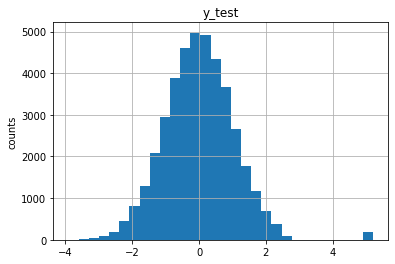

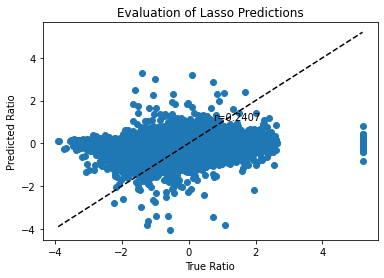

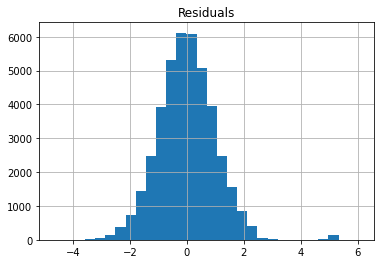

In [86]:
models_list = pickle.load(open('../data/models_list.pkl','rb'))
print(models_list)
for k in models_list:
    if k.find('train')>-1:
        k_test = k.replace('train','test')
        X_train = pd.read_csv('../data/'+k+'.csv')
        X_test = pd.read_csv('../data/'+k_test+'.csv')
        y_train = X_train.loc[:,'completion_ratio'].copy()
        y_test = X_test.loc[:,'completion_ratio'].copy()
        features = [ col for col in X_train.columns if col != 'completion_ratio']
        X_train = X_train.loc[:,features].copy()
        X_test = X_test.loc[:,features].copy()
        print("Model ",k)
        
        print(lin_model.__class__.__name__)
        lin_model.fit(X_train, y_train)
        evaluation(lin_model, X_train, y_train, X_test, y_test)
        
        print(ridge_regr.__class__.__name__)
        ridge_regr.fit(X_train, y_train)
        evaluation(ridge_regr, X_train, y_train, X_test, y_test)
        

## Debug performance of the model

Model  X_train LinearRegression 

train mse: 0.04986
train rmse: 0.22328
train r2: 0.0029575471402680797

test mse: 0.0497
test rmse: 0.22293
test r2: 0.0021629833713189273

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51278
dtype: float64
Average completion ratio pred:  0    0.51516
dtype: float64


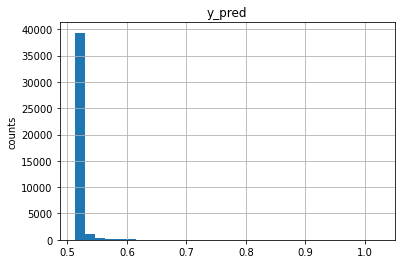

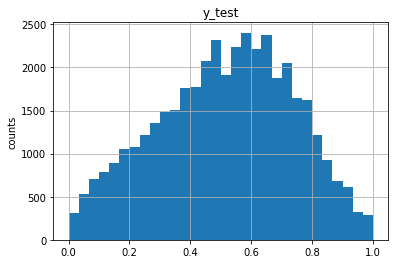

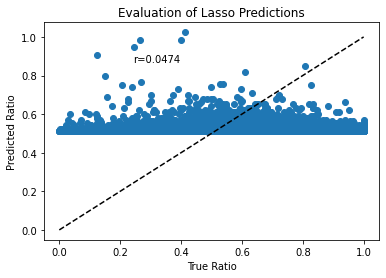

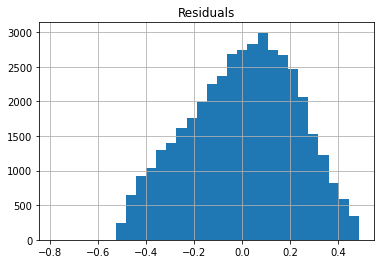

In [91]:
models_list = pickle.load(open('../data/models_list.pkl','rb'))
k = models_list[0]
if k.find('train')>-1:
    k_test = k.replace('train','test')
    X_train = pd.read_csv('../data/'+k+'.csv')
    X_test = pd.read_csv('../data/'+k_test+'.csv')
    y_train = X_train.loc[:,'completion_ratio'].copy()
    y_test = X_test.loc[:,'completion_ratio'].copy()
    features = [ col for col in X_train.columns if col != 'completion_ratio']
    X_train = X_train.loc[:,features].copy()
    X_test = X_test.loc[:,features].copy()
    

    
    # Improvements:
    # MinMaxScaler
    # Sample less 
    # pick some features
    # More complex algorithm : random Forrest
    # More complex algorithm : Knn-regression
    
    X_train = X_train.loc[:,['feat_36','feat_01']]
    X_test = X_test.loc[:,['feat_36','feat_01']]

    lin_model = LinearRegression()
    print("Model ",k, lin_model.__class__.__name__,"\n")
    lin_model.fit(X_train, y_train)
    evaluation(lin_model, X_train, y_train, X_test, y_test)


## Looking for a model with enouch capacity

Model  LinearRegression 

train mse: 0.04668
train rmse: 0.21605
train r2: 0.06373230687490727

test mse: 0.04693
test rmse: 0.21662
test r2: 0.06316526917993348

Average completion ratio train:  0.52984
Average completion ratio test:  0    0.53077
dtype: float64
Average completion ratio test:  0    0.51527
dtype: float64
Average completion ratio pred:  0    0.52389
dtype: float64
Average completion ratio pred:  0    0.51492
dtype: float64


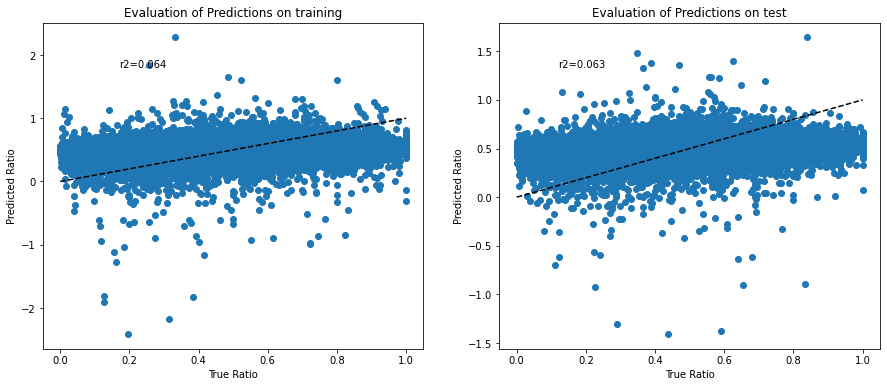

time:  2 s


LinearRegression()

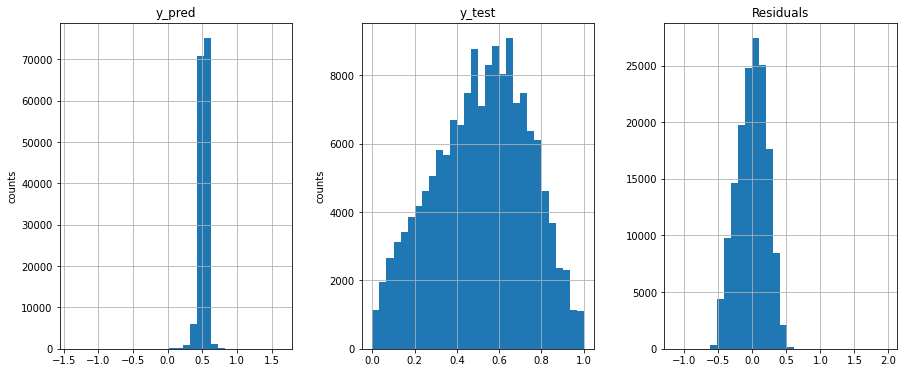

In [36]:
evaluate_model(
 LinearRegression()
)

Model  RandomForestRegressor 

train mse: 0.04438
train rmse: 0.21068
train r2: 0.11043013305222238

test mse: 0.04477
test rmse: 0.21159
test r2: 0.10749328731084129

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53125
dtype: float64
Average completion ratio test:  0    0.5156
dtype: float64
Average completion ratio pred:  0    0.5217
dtype: float64
Average completion ratio pred:  0    0.51482
dtype: float64


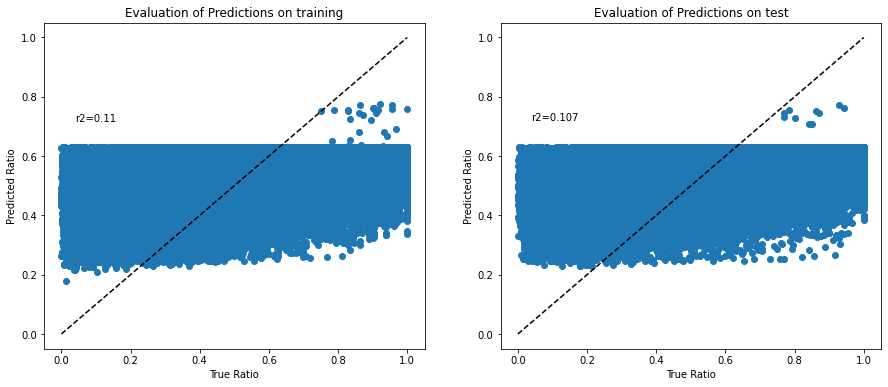

time:  91 s


RandomForestRegressor(max_depth=8)

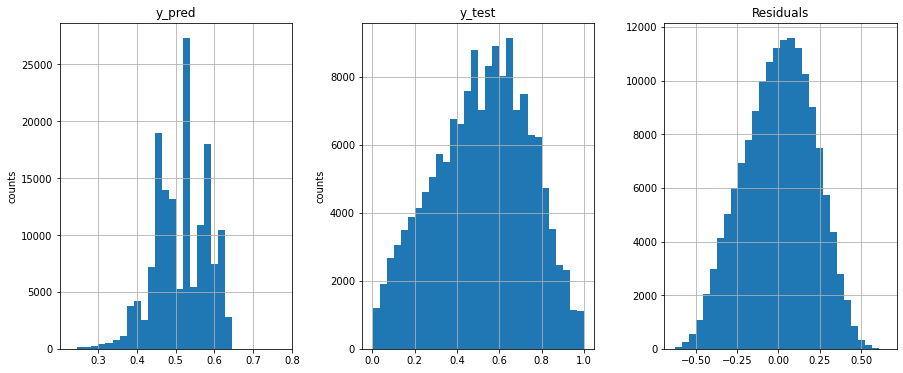

In [37]:
evaluate_model(RandomForestRegressor(max_depth=8))

Model  RandomForestRegressor 

train mse: 0.03972
train rmse: 0.19929
train r2: 0.20283247881842392

test mse: 0.04363
test rmse: 0.20888
test r2: 0.12356224062024113

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53125
dtype: float64
Average completion ratio test:  0    0.51542
dtype: float64
Average completion ratio pred:  0    0.52378
dtype: float64
Average completion ratio pred:  0    0.5157
dtype: float64


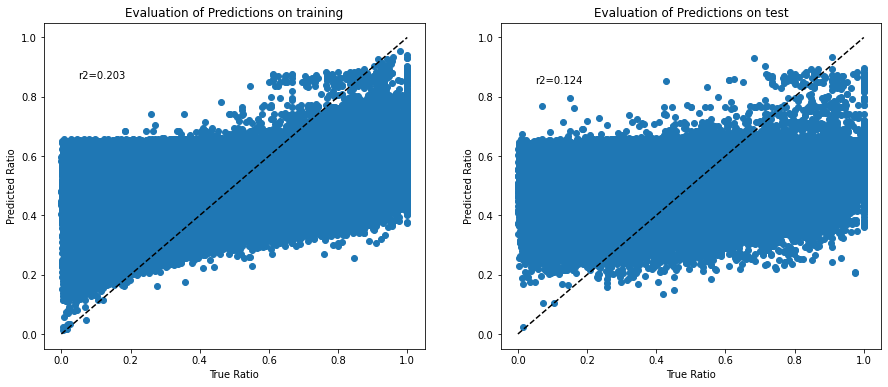

time:  153 s


RandomForestRegressor(max_depth=16)

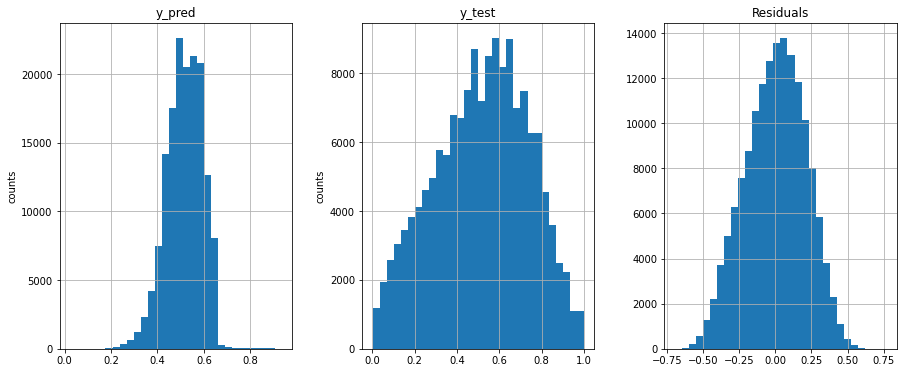

In [38]:
evaluate_model(RandomForestRegressor(max_depth=16))

Model  RandomForestRegressor 

train mse: 0.02826
train rmse: 0.16812
train r2: 0.43380154028303475

test mse: 0.04501
test rmse: 0.21216
test r2: 0.09370548169549087

Average completion ratio train:  0.53018
Average completion ratio test:  0    0.53117
dtype: float64
Average completion ratio test:  0    0.51587
dtype: float64
Average completion ratio pred:  0    0.52071
dtype: float64
Average completion ratio pred:  0    0.51558
dtype: float64


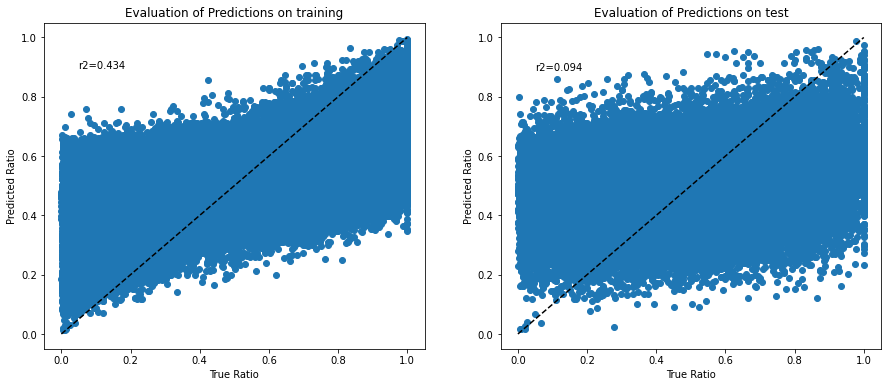

time:  219 s


RandomForestRegressor(max_depth=32)

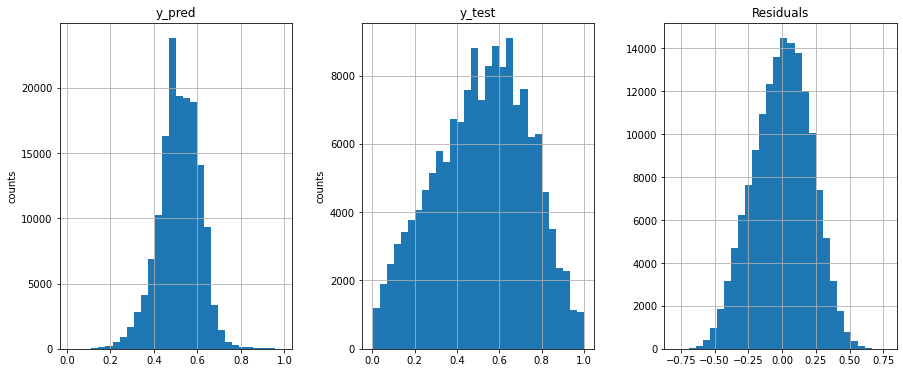

In [39]:
evaluate_model(RandomForestRegressor(max_depth=32))

Model  RandomForestRegressor 

train mse: 0.0326
train rmse: 0.18055
train r2: 0.3450251281331135

test mse: 0.04396
test rmse: 0.20966
test r2: 0.11888319694638516

Average completion ratio train:  0.53125
Average completion ratio test:  0    0.53191
dtype: float64
Average completion ratio test:  0    0.51594
dtype: float64
Average completion ratio pred:  0    0.52379
dtype: float64
Average completion ratio pred:  0    0.5162
dtype: float64


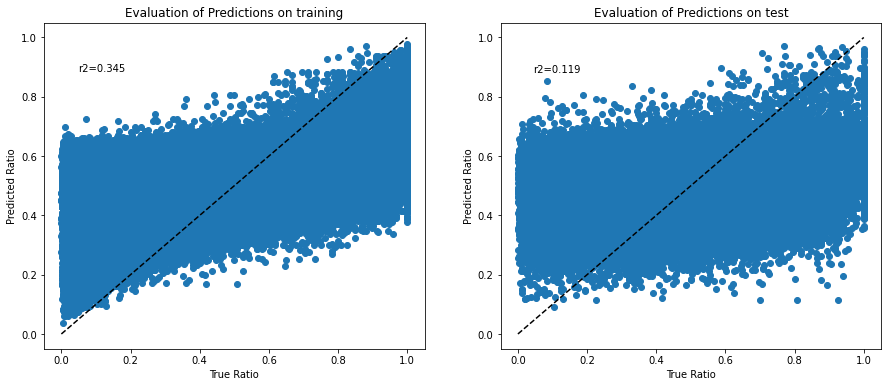

time:  191 s


RandomForestRegressor(max_depth=24)

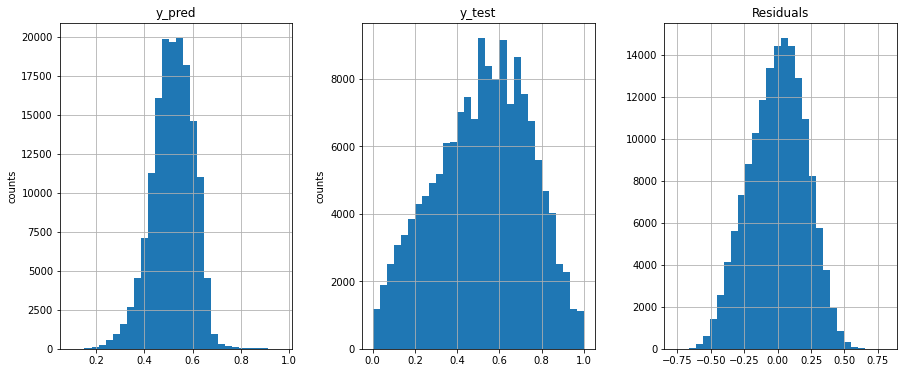

In [40]:
evaluate_model(RandomForestRegressor(max_depth=24))

Model  RandomForestRegressor 

train mse: 0.04264
train rmse: 0.20649
train r2: 0.14492539909264024

test mse: 0.04406
test rmse: 0.20992
test r2: 0.1177372371198

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.52941
dtype: float64
Average completion ratio test:  0    0.51466
dtype: float64
Average completion ratio pred:  0    0.52233
dtype: float64
Average completion ratio pred:  0    0.51486
dtype: float64


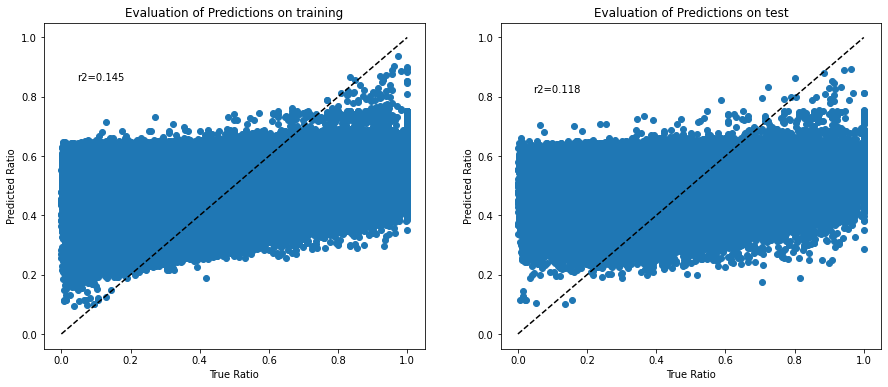

time:  120 s


RandomForestRegressor(max_depth=12)

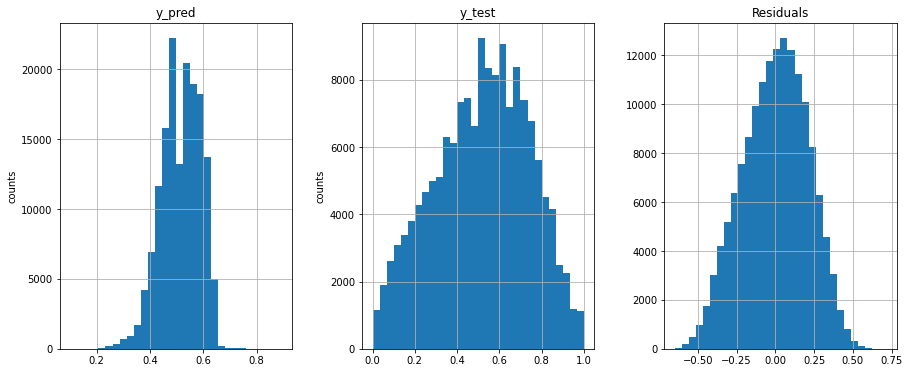

In [41]:
evaluate_model(RandomForestRegressor(max_depth=12))

Model  KNeighborsRegressor 

train mse: 0.04342
train rmse: 0.20838
train r2: 0.12915080653073052

test mse: 0.06505
test rmse: 0.25506
test r2: -0.3060756212403035

Average completion ratio train:  0.52941
Average completion ratio test:  0    0.53068
dtype: float64
Average completion ratio test:  0    0.51526
dtype: float64
Average completion ratio pred:  0    0.52788
dtype: float64
Average completion ratio pred:  0    0.52197
dtype: float64


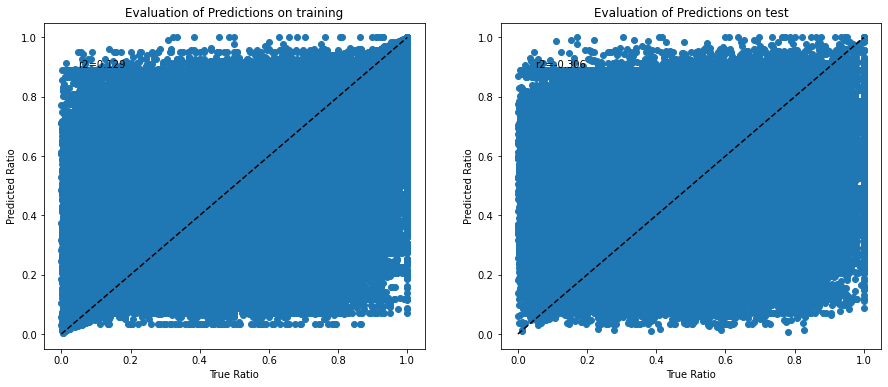

time:  1368 s


KNeighborsRegressor(n_neighbors=2)

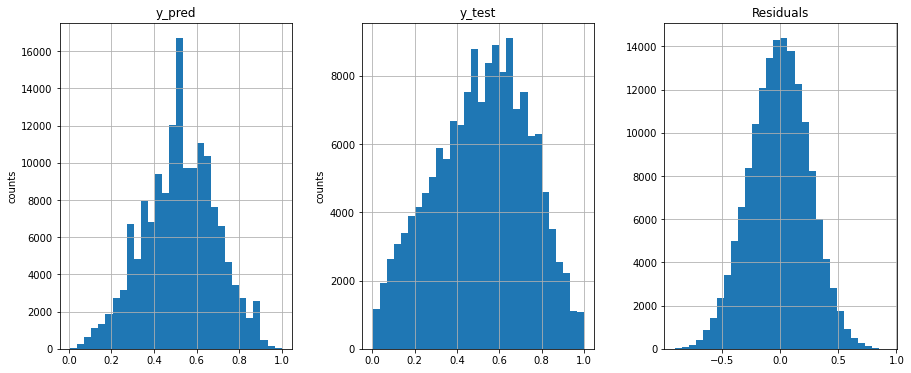

In [42]:
evaluate_model(KNeighborsRegressor(n_neighbors=2))

Model  KNeighborsRegressor 

train mse: 0.04201
train rmse: 0.20495
train r2: 0.15859162147173933

test mse: 0.05186
test rmse: 0.22773
test r2: -0.042496980173990284

Average completion ratio train:  0.52941
Average completion ratio test:  0    0.53191
dtype: float64
Average completion ratio test:  0    0.51565
dtype: float64
Average completion ratio pred:  0    0.52073
dtype: float64
Average completion ratio pred:  0    0.52089
dtype: float64


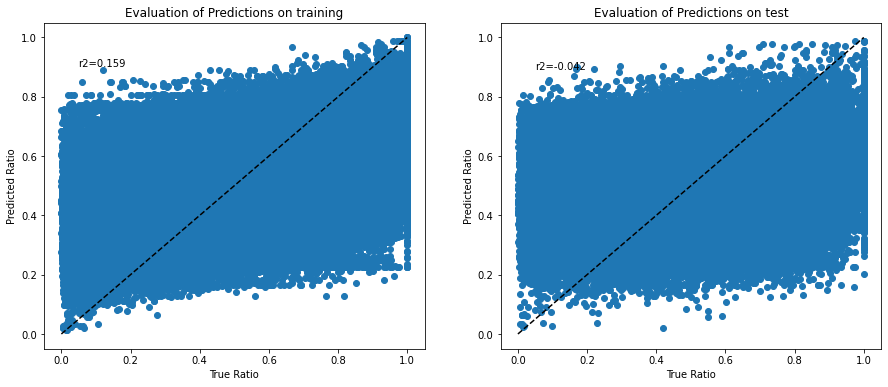

time:  1355 s


KNeighborsRegressor()

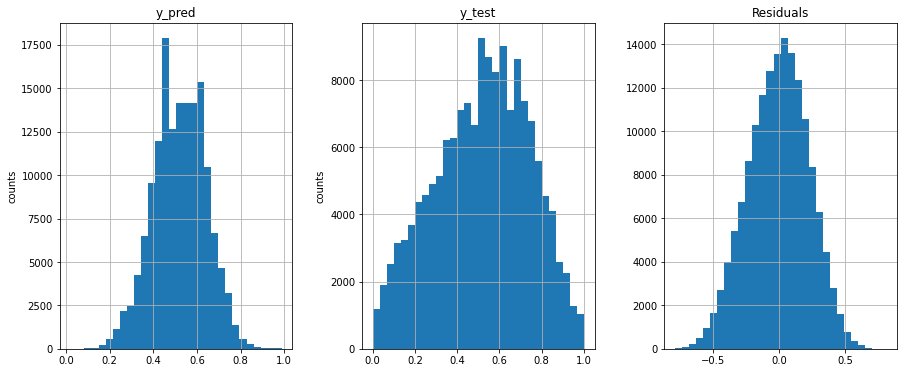

In [43]:
evaluate_model(KNeighborsRegressor(n_neighbors=5))

Model  KNeighborsRegressor 

train mse: 0.04328
train rmse: 0.20804
train r2: 0.13095692723258334

test mse: 0.04847
test rmse: 0.22017
test r2: 0.02677060744774329

Average completion ratio train:  0.53
Average completion ratio test:  0    0.53061
dtype: float64
Average completion ratio test:  0    0.51493
dtype: float64
Average completion ratio pred:  0    0.53422
dtype: float64
Average completion ratio pred:  0    0.52813
dtype: float64


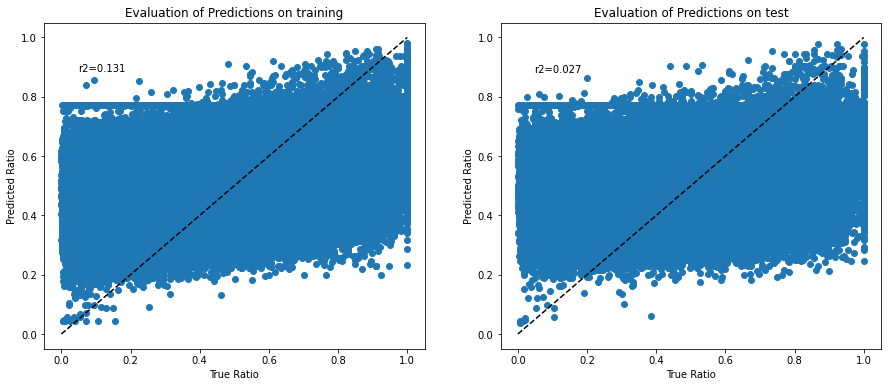

time:  1717 s


KNeighborsRegressor(n_neighbors=10)

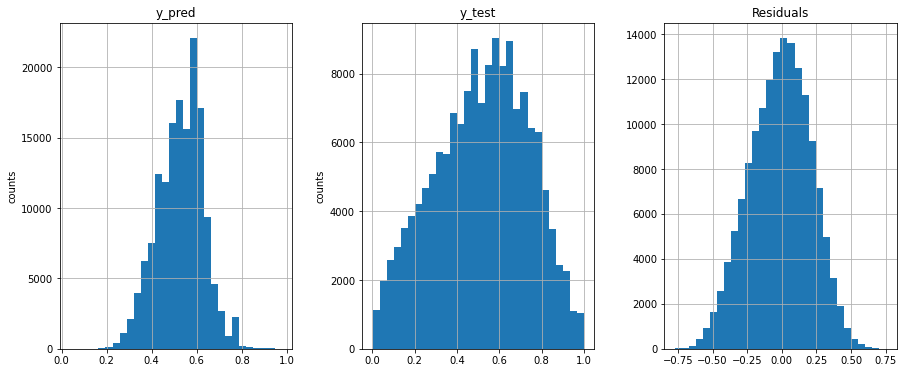

In [44]:
evaluate_model(KNeighborsRegressor(n_neighbors=10))

In [45]:
evaluate_model(KNeighborsRegressor(n_neighbors=20))

Model  KNeighborsRegressor 



KeyboardInterrupt: 

In [13]:
evaluate_model(
    KernelRidge(kernel='rbf', gamma=0.1)
)

Model  KernelRidge 



MemoryError: Unable to allocate 16.0 GiB for an array with shape (46407, 46407) and data type float64

In [ ]:
evaluate_model(
    SVR(kernel='rbf', gamma=0.1)
)

Model  SVR 



In [23]:
grid = GridSearchCV(
    RandomForestRegressor(),
    n_jobs=4,
    param_grid={
        'max_depth':[2,4,6,8,10,12,16,32,64],
        'n_estimators':[2,4,8,16],
        'max_features':[2,4,6,8,16,32],
    },
    scoring='neg_root_mean_squared_error',
)

Model  GridSearchCV 

train mse: 0.04135
train rmse: 0.20334
train r2: 0.1721259261013125

test mse: 0.04379
test rmse: 0.20926
test r2: 0.12270304284185551

Average completion ratio train:  0.52941
Average completion ratio test:  0    0.52941
dtype: float64
Average completion ratio test:  0    0.51439
dtype: float64
Average completion ratio pred:  0    0.51992
dtype: float64
Average completion ratio pred:  0    0.51463
dtype: float64


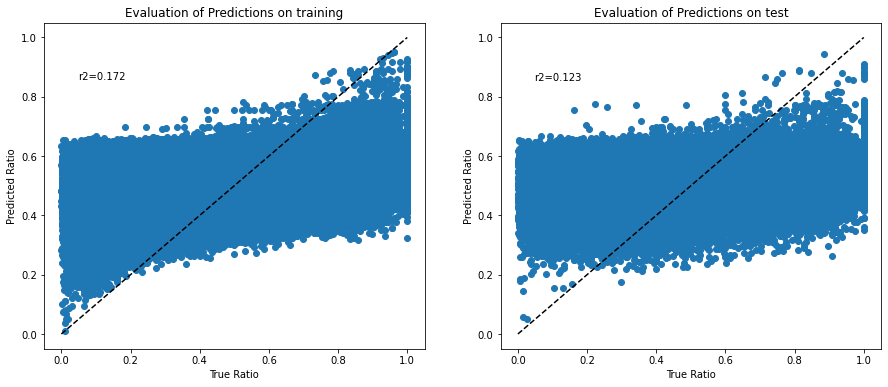

time:  984 s


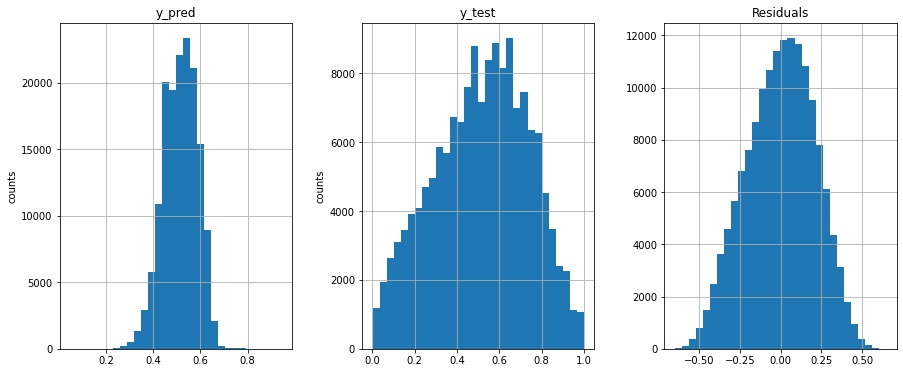

In [46]:
grid = evaluate_model(
    grid
)

In [25]:
grid.best_score_

-0.20965724963779855

In [26]:
grid.best_params_

{'max_depth': 16, 'max_features': 8, 'n_estimators': 16}

## Run the best RandomForrest through all the datasets

['X_train', 'X_test', 'X_train_dr', 'X_test_dr', 'X_train_qt', 'X_test_qt', 'X_train_dr_qt', 'X_test_dr_qt', 'X_train_nc', 'X_test_nc', 'X_train_dr_nc', 'X_test_dr_nc', 'X_train_qt_nc', 'X_test_qt_nc', 'X_train_dr_qt_nc', 'X_test_dr_qt_nc', 'X_train_fs', 'X_test_fs', 'X_train_dr_fs', 'X_test_dr_fs', 'X_train_qt_fs', 'X_test_qt_fs', 'X_train_dr_qt_fs', 'X_test_dr_qt_fs', 'X_train_nc_fs', 'X_test_nc_fs', 'X_train_dr_nc_fs', 'X_test_dr_nc_fs', 'X_train_qt_nc_fs', 'X_test_qt_nc_fs', 'X_train_dr_qt_nc_fs', 'X_test_dr_qt_nc_fs']
Model  X_train
RandomForestRegressor
train mse: 0.04332
train rmse: 0.20813
train r2: 0.13371143889514858

test mse: 0.04415
test rmse: 0.21013
test r2: 0.11348274140481063

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51543
dtype: float64
Average completion ratio pred:  0    0.5152
dtype: float64


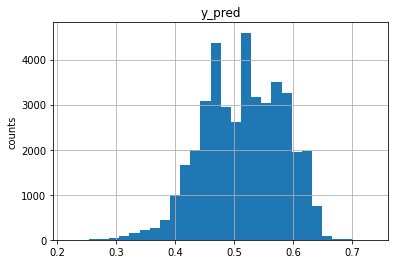

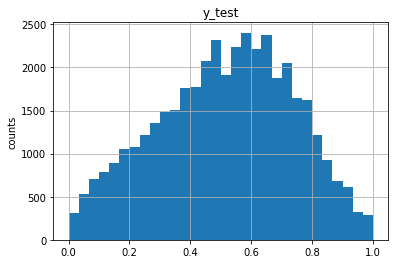

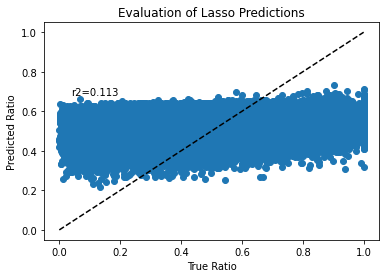

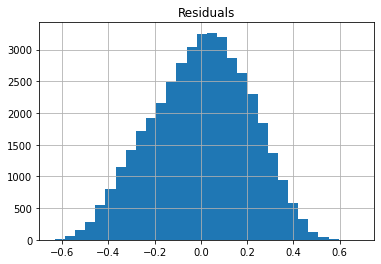

Ridge
train mse: 0.04684
train rmse: 0.21642
train r2: 0.06331720082003234

test mse: 0.0466
test rmse: 0.21586
test r2: 0.06442637161549147

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52392
dtype: float64
Average completion ratio pred:  0    0.5154
dtype: float64


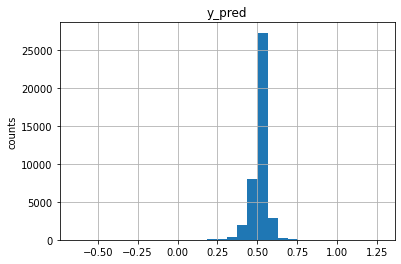

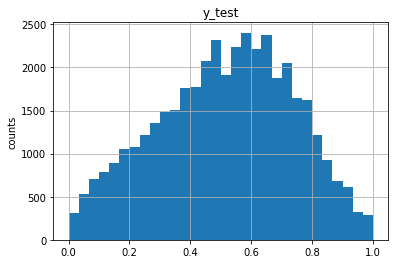

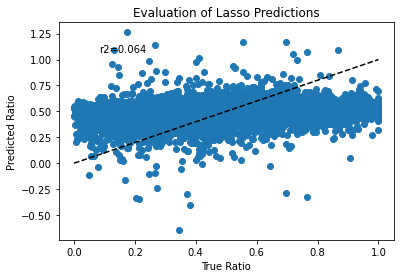

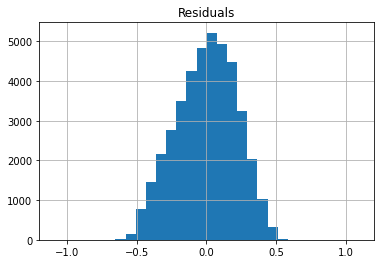

Model  X_train_dr
RandomForestRegressor
train mse: 0.04336
train rmse: 0.20823
train r2: 0.1328367027938394

test mse: 0.04416
test rmse: 0.21015
test r2: 0.11332534199729094

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51391
dtype: float64
Average completion ratio pred:  0    0.51506
dtype: float64


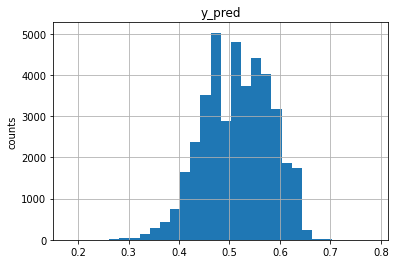

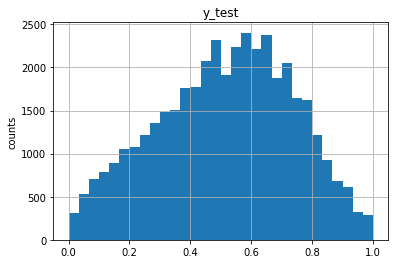

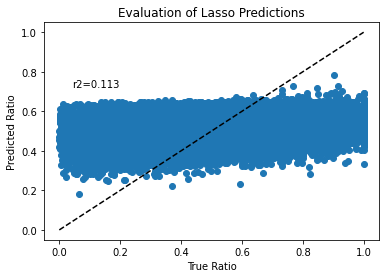

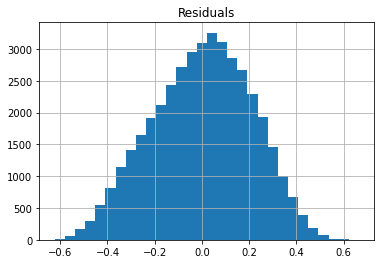

Ridge
train mse: 0.04684
train rmse: 0.21642
train r2: 0.06331720082003234

test mse: 0.0466
test rmse: 0.21586
test r2: 0.06442637161549147

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52392
dtype: float64
Average completion ratio pred:  0    0.5154
dtype: float64


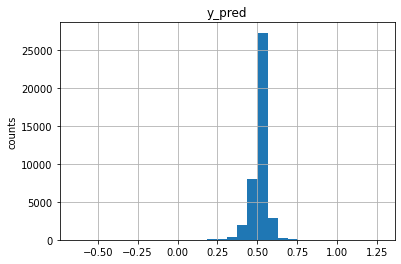

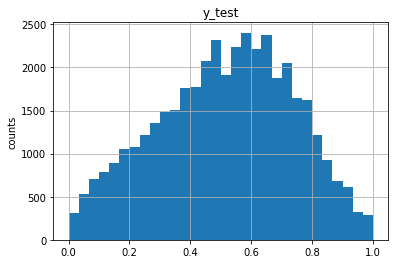

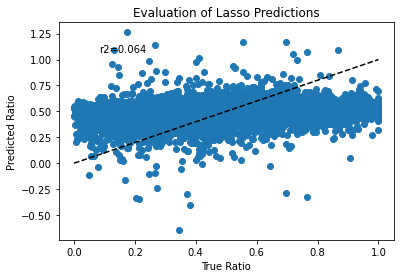

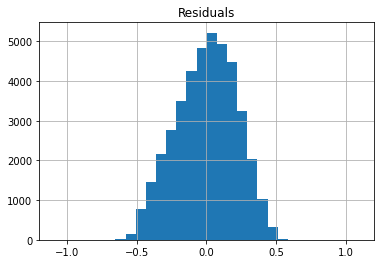

Model  X_train_qt
RandomForestRegressor
train mse: 0.95807
train rmse: 0.97881
train r2: 0.1244684193221367

test mse: 0.97619
test rmse: 0.98802
test r2: 0.10385832869521827

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.00951
dtype: float64
Average completion ratio pred:  0    0.00744
dtype: float64


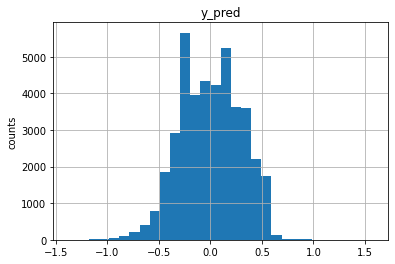

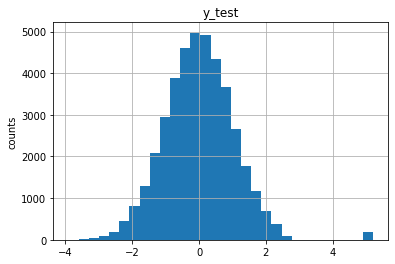

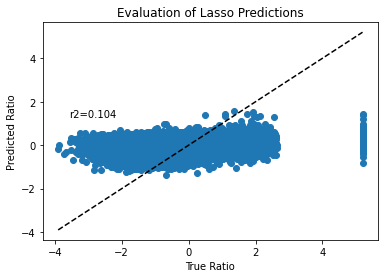

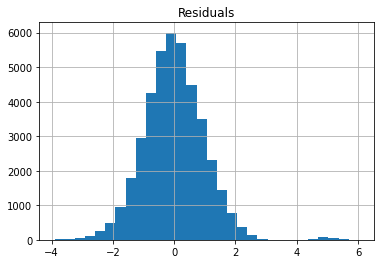

Ridge
train mse: 1.03177
train rmse: 1.01576
train r2: 0.05711707514762476

test mse: 1.02649
test rmse: 1.01316
test r2: 0.05767743025111871

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04719
dtype: float64
Average completion ratio pred:  0    0.008
dtype: float64


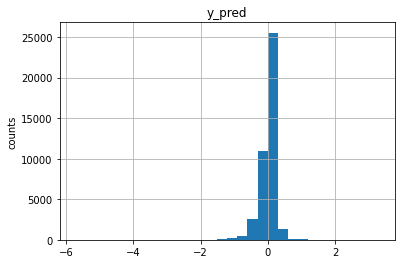

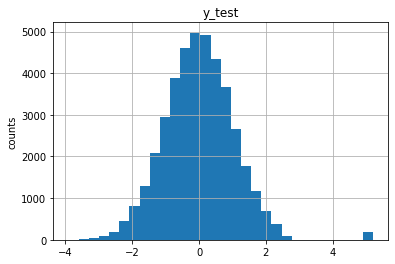

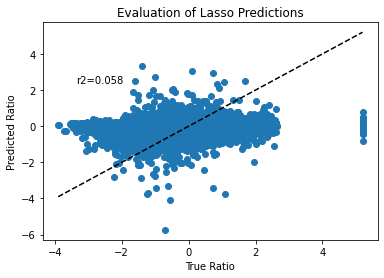

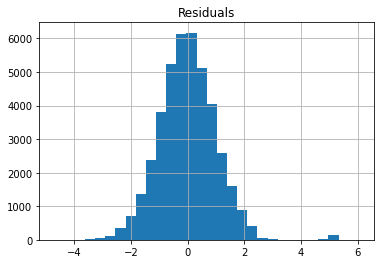

Model  X_train_dr_qt
RandomForestRegressor
train mse: 0.95821
train rmse: 0.97888
train r2: 0.12434086022167268

test mse: 0.97683
test rmse: 0.98835
test r2: 0.10326307960034298

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.01783
dtype: float64
Average completion ratio pred:  0    0.00725
dtype: float64


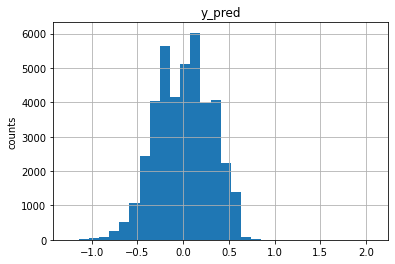

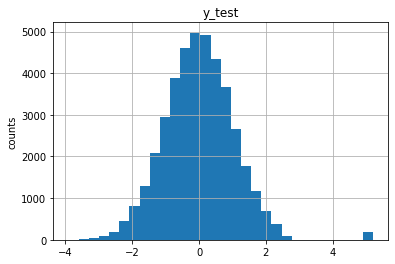

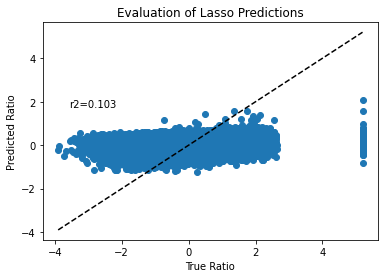

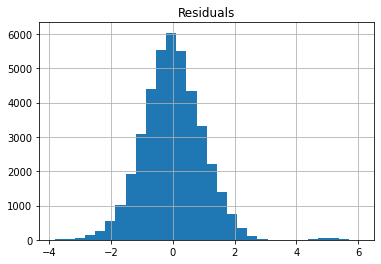

Ridge
train mse: 1.03177
train rmse: 1.01576
train r2: 0.05711707514762476

test mse: 1.02649
test rmse: 1.01316
test r2: 0.05767743025111871

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04719
dtype: float64
Average completion ratio pred:  0    0.008
dtype: float64


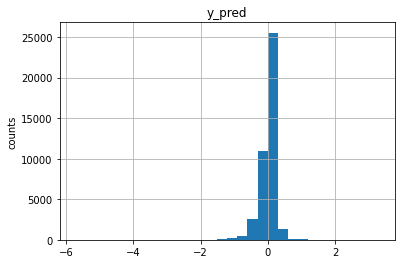

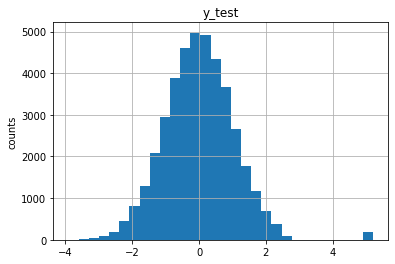

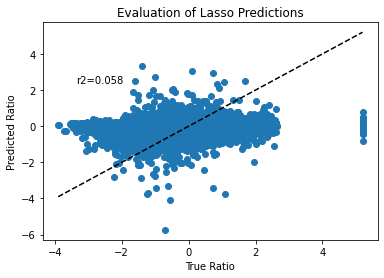

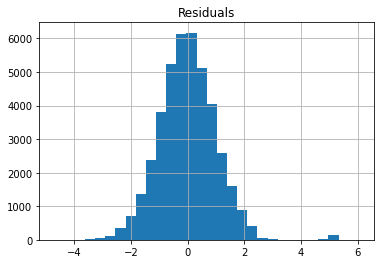

Model  X_train_nc
RandomForestRegressor
train mse: 0.04337
train rmse: 0.20826
train r2: 0.13260977565163434

test mse: 0.04416
test rmse: 0.21014
test r2: 0.11341160870219569

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51474
dtype: float64
Average completion ratio pred:  0    0.51528
dtype: float64


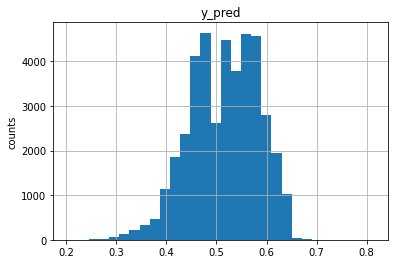

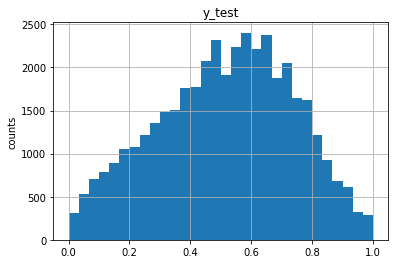

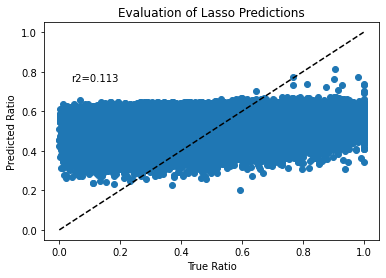

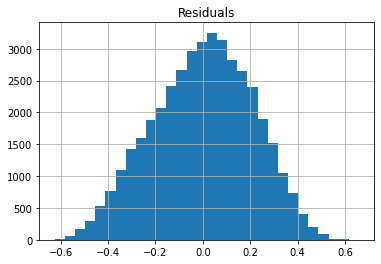

Ridge
train mse: 0.04685
train rmse: 0.21645
train r2: 0.06307533055891557

test mse: 0.04659
test rmse: 0.21585
test r2: 0.06453665370197625

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52383
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


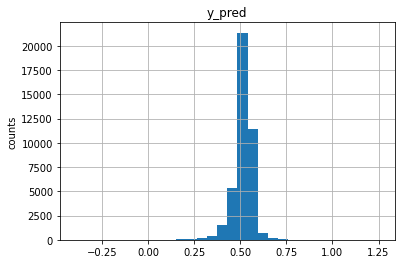

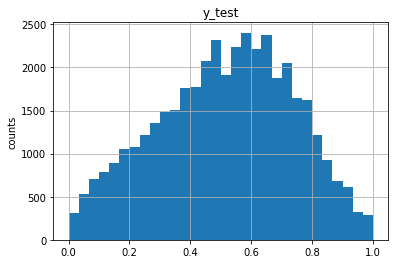

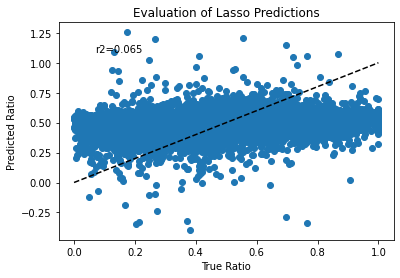

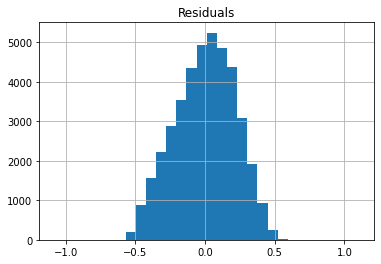

Model  X_train_dr_nc
RandomForestRegressor
train mse: 0.04331
train rmse: 0.20811
train r2: 0.13387283761609114

test mse: 0.0441
test rmse: 0.20999
test r2: 0.1146152552220353

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51958
dtype: float64
Average completion ratio pred:  0    0.51529
dtype: float64


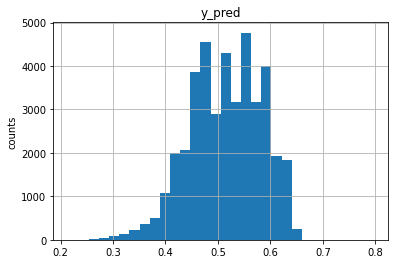

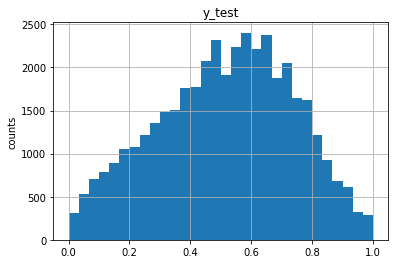

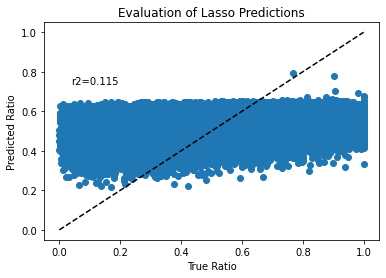

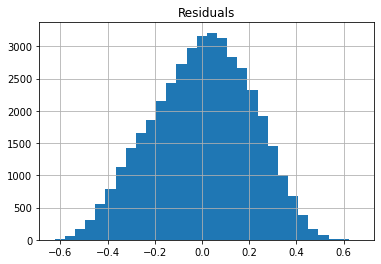

Ridge
train mse: 0.04685
train rmse: 0.21645
train r2: 0.06307533055891557

test mse: 0.04659
test rmse: 0.21585
test r2: 0.06453665370197625

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52383
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


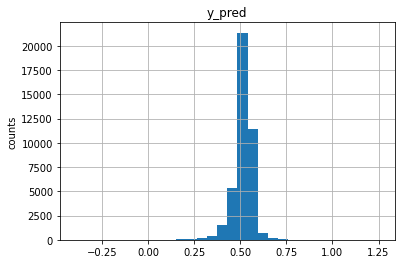

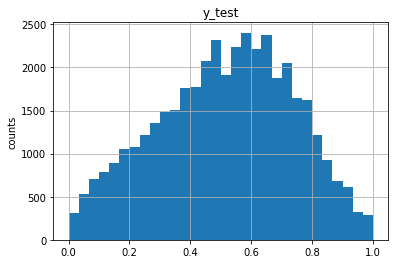

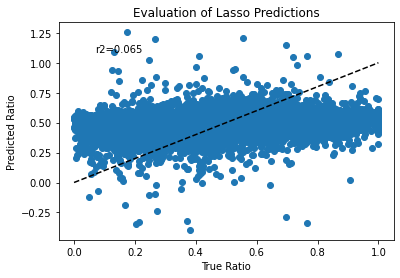

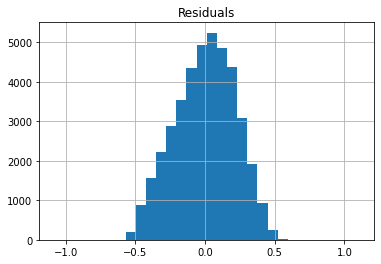

Model  X_train_qt_nc
RandomForestRegressor
train mse: 0.95751
train rmse: 0.97853
train r2: 0.12497813767794308

test mse: 0.97557
test rmse: 0.98771
test r2: 0.10442616389290216

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.02033
dtype: float64
Average completion ratio pred:  0    0.00747
dtype: float64


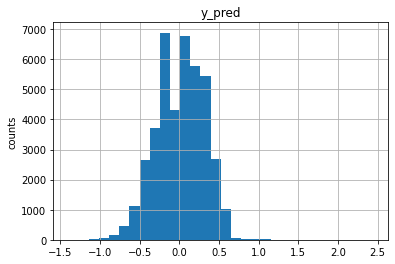

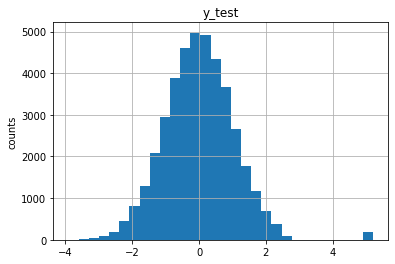

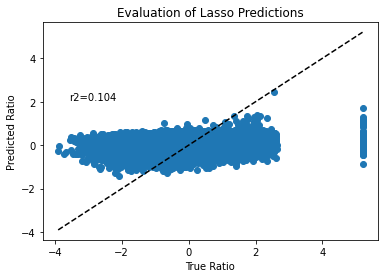

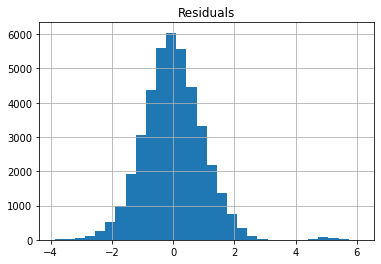

Ridge
train mse: 1.03211
train rmse: 1.01593
train r2: 0.05681113354170697

test mse: 1.02631
test rmse: 1.01307
test r2: 0.057842225324631014

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04671
dtype: float64
Average completion ratio pred:  0    0.0081
dtype: float64


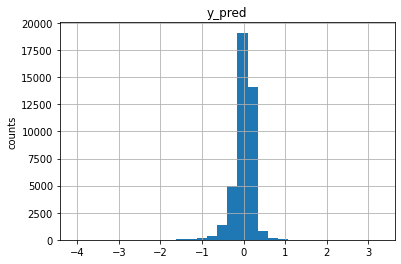

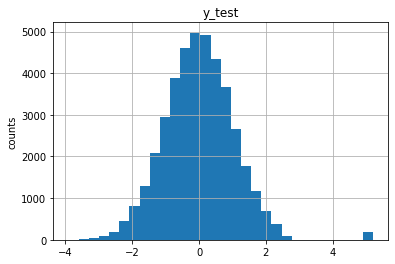

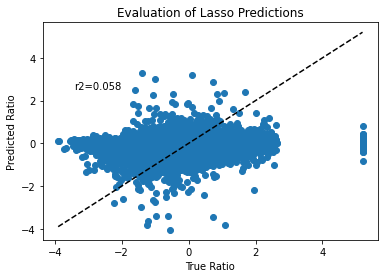

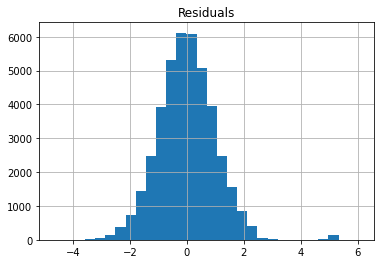

Model  X_train_dr_qt_nc
RandomForestRegressor
train mse: 0.9587
train rmse: 0.97913
train r2: 0.12389338820325557

test mse: 0.9761
test rmse: 0.98798
test r2: 0.10393442771279415

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.00925
dtype: float64
Average completion ratio pred:  0    0.00695
dtype: float64


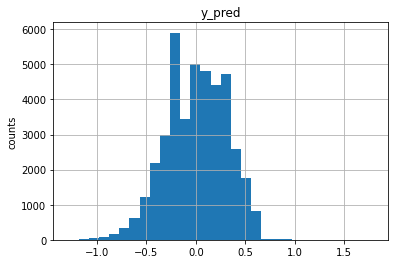

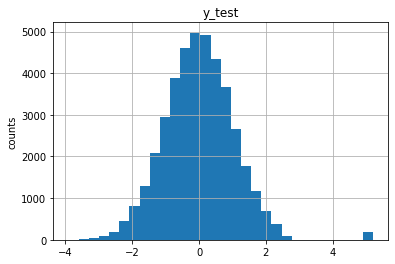

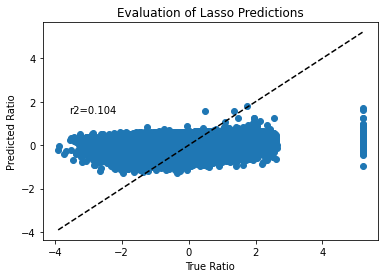

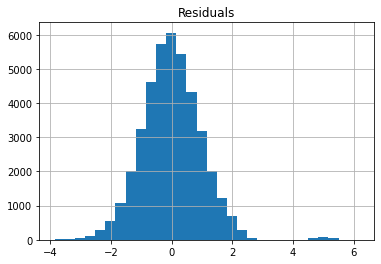

Ridge
train mse: 1.03211
train rmse: 1.01593
train r2: 0.05681113354170697

test mse: 1.02631
test rmse: 1.01307
test r2: 0.057842225324631014

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04671
dtype: float64
Average completion ratio pred:  0    0.0081
dtype: float64


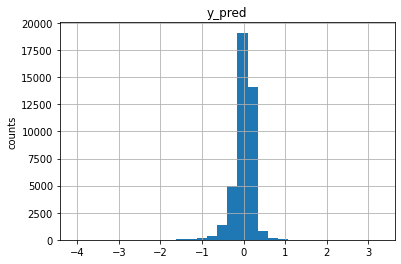

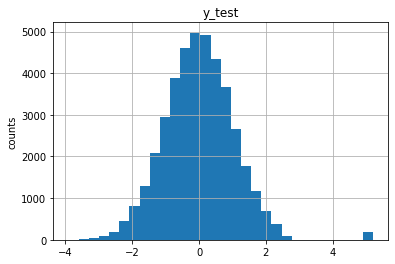

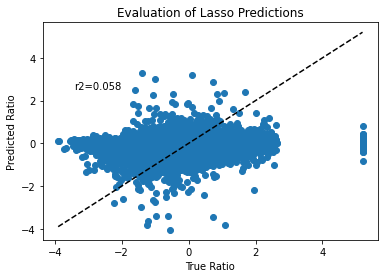

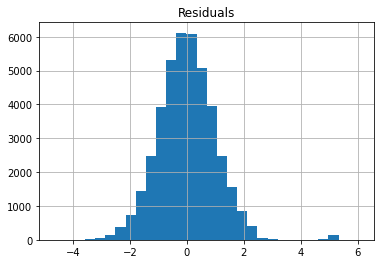

Model  X_train_fs
RandomForestRegressor
train mse: 0.04343
train rmse: 0.2084
train r2: 0.13146826209623297

test mse: 0.04419
test rmse: 0.21021
test r2: 0.11282108145942749

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51716
dtype: float64
Average completion ratio pred:  0    0.51523
dtype: float64


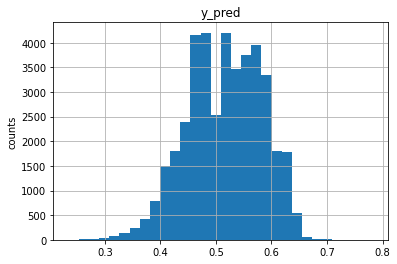

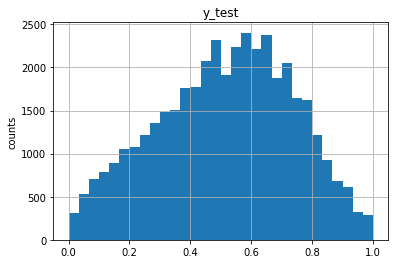

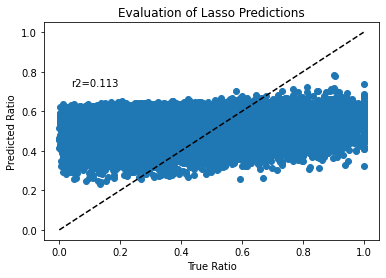

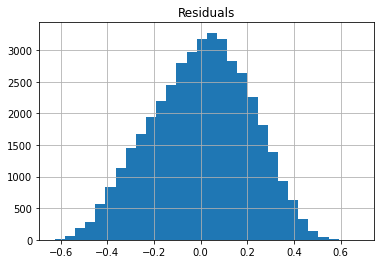

Ridge
train mse: 0.04684
train rmse: 0.21643
train r2: 0.06324375795672788

test mse: 0.0466
test rmse: 0.21587
test r2: 0.0644117559810774

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52389
dtype: float64
Average completion ratio pred:  0    0.51537
dtype: float64


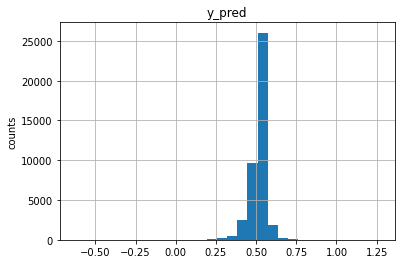

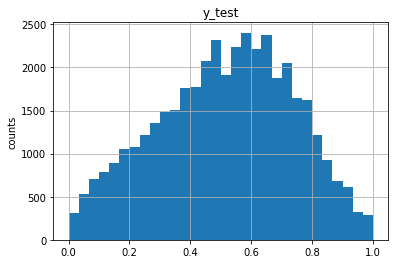

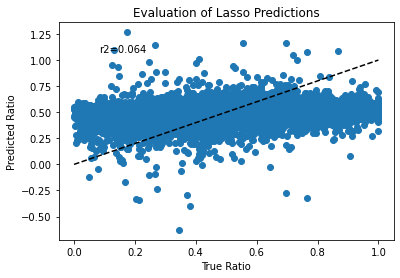

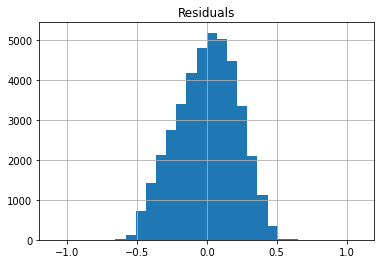

Model  X_train_dr_fs
RandomForestRegressor
train mse: 0.04342
train rmse: 0.20837
train r2: 0.13168799477121085

test mse: 0.04417
test rmse: 0.21016
test r2: 0.11323814143659339

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51708
dtype: float64
Average completion ratio pred:  0    0.51523
dtype: float64


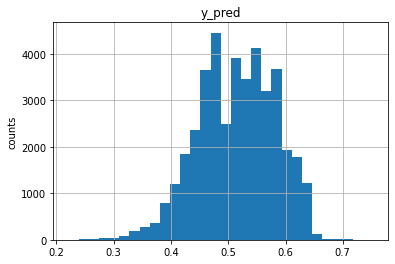

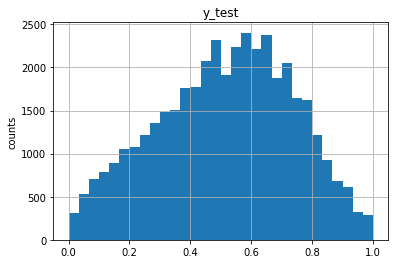

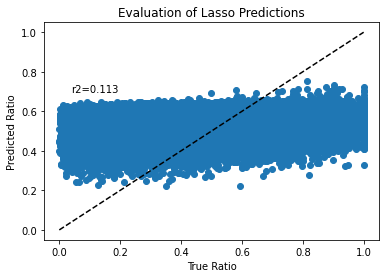

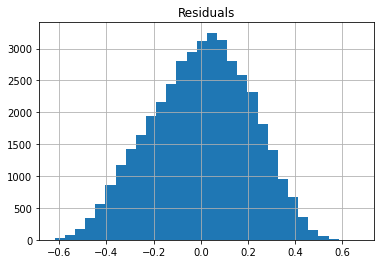

Ridge
train mse: 0.04684
train rmse: 0.21643
train r2: 0.06324375795672788

test mse: 0.0466
test rmse: 0.21587
test r2: 0.0644117559810774

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52389
dtype: float64
Average completion ratio pred:  0    0.51537
dtype: float64


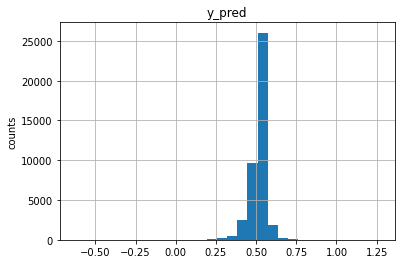

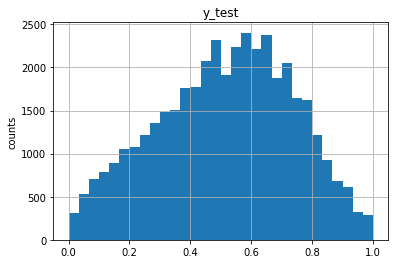

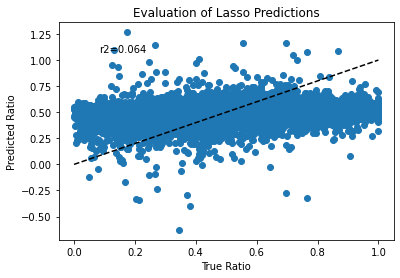

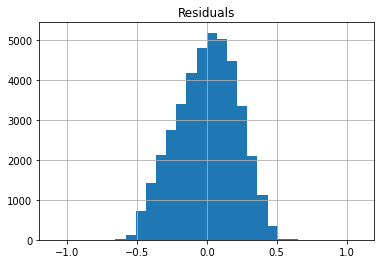

Model  X_train_qt_fs
RandomForestRegressor
train mse: 0.95706
train rmse: 0.9783
train r2: 0.12538933598895052

test mse: 0.97569
test rmse: 0.98777
test r2: 0.10431666939896433

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.01606
dtype: float64
Average completion ratio pred:  0    0.00616
dtype: float64


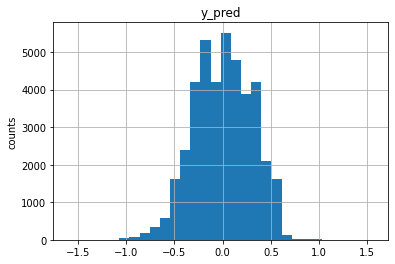

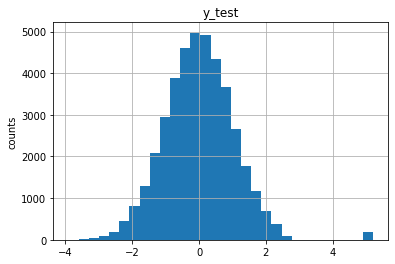

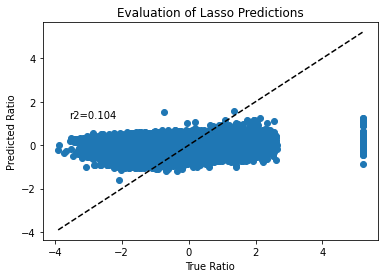

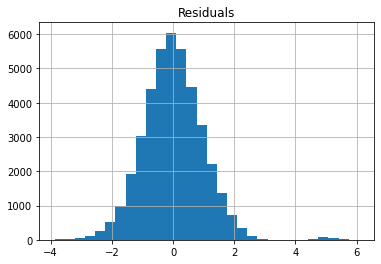

Ridge
train mse: 1.03177
train rmse: 1.01576
train r2: 0.05711455535132948

test mse: 1.0265
test rmse: 1.01316
test r2: 0.05767230510298549

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04726
dtype: float64
Average completion ratio pred:  0    0.00801
dtype: float64


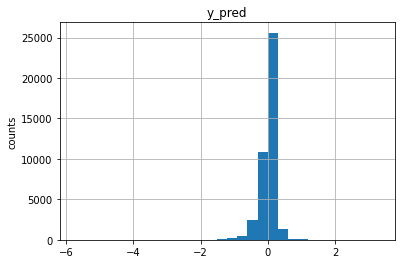

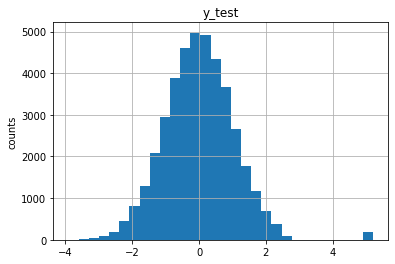

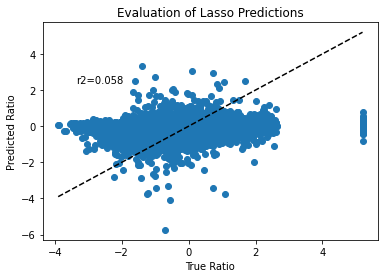

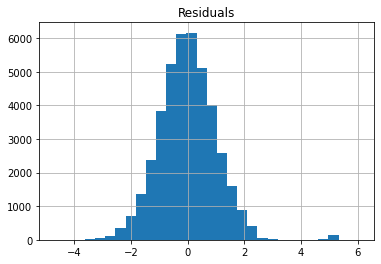

Model  X_train_dr_qt_fs
RandomForestRegressor
train mse: 0.95749
train rmse: 0.97852
train r2: 0.12499413260699654

test mse: 0.97638
test rmse: 0.98812
test r2: 0.10367948049971765

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.00489
dtype: float64
Average completion ratio pred:  0    0.0063
dtype: float64


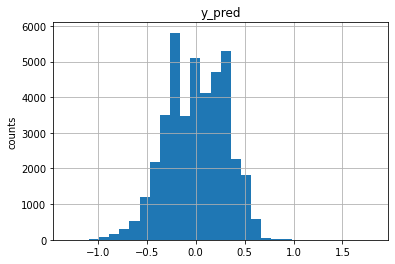

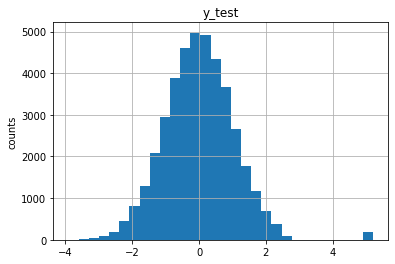

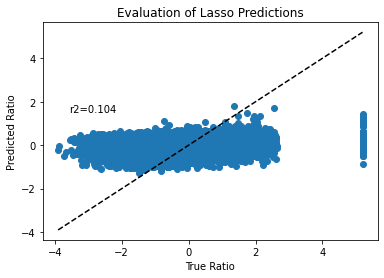

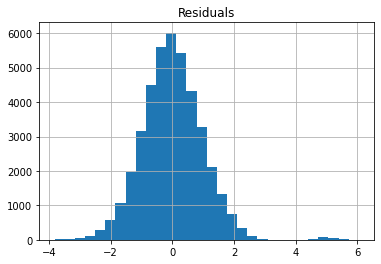

Ridge
train mse: 1.03177
train rmse: 1.01576
train r2: 0.05711455535132948

test mse: 1.0265
test rmse: 1.01316
test r2: 0.05767230510298549

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04726
dtype: float64
Average completion ratio pred:  0    0.00801
dtype: float64


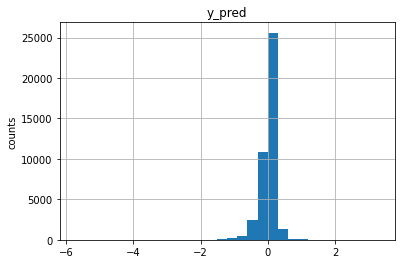

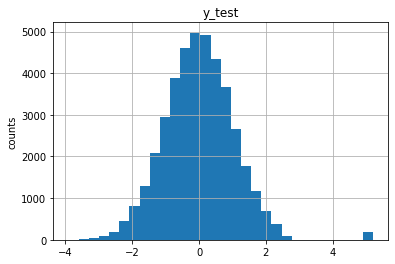

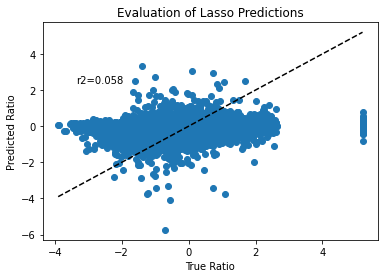

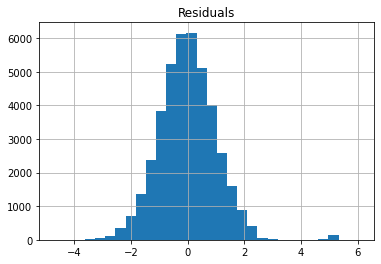

Model  X_train_nc_fs
RandomForestRegressor
train mse: 0.04334
train rmse: 0.20817
train r2: 0.13334974214211837

test mse: 0.04412
test rmse: 0.21006
test r2: 0.11409428432349322

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51468
dtype: float64
Average completion ratio pred:  0    0.51528
dtype: float64


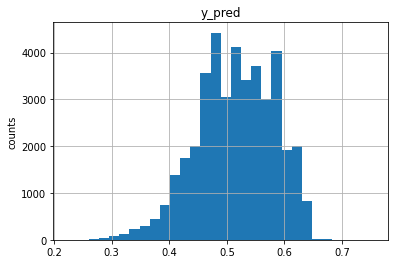

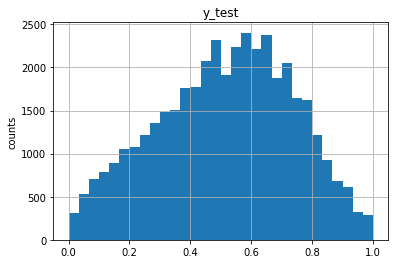

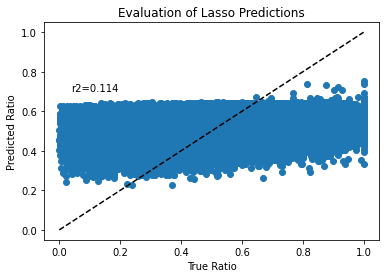

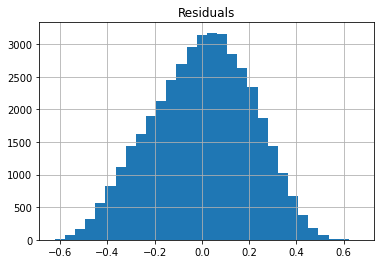

Ridge
train mse: 0.04685
train rmse: 0.21645
train r2: 0.06307517109741856

test mse: 0.04659
test rmse: 0.21585
test r2: 0.0645288822556952

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52384
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


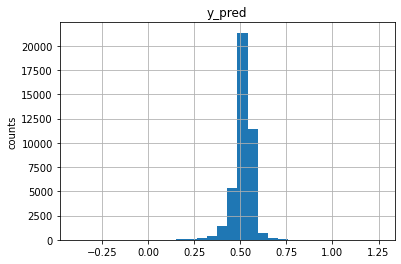

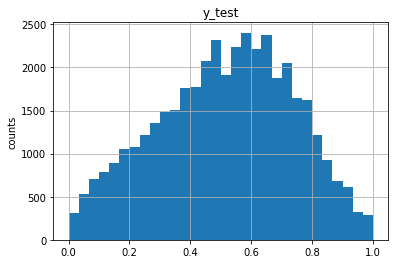

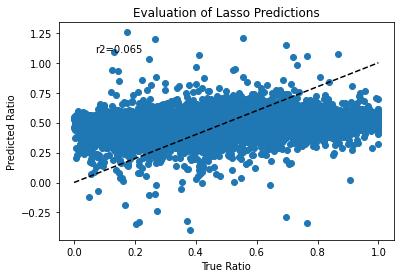

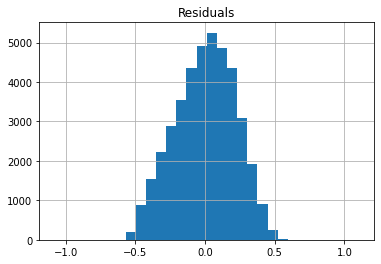

Model  X_train_dr_nc_fs
RandomForestRegressor
train mse: 0.04341
train rmse: 0.20834
train r2: 0.1319492971181755

test mse: 0.04415
test rmse: 0.21013
test r2: 0.11347994126371352

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.51934
dtype: float64
Average completion ratio pred:  0    0.51537
dtype: float64


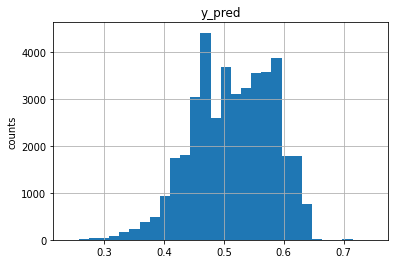

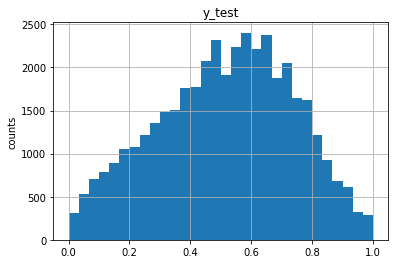

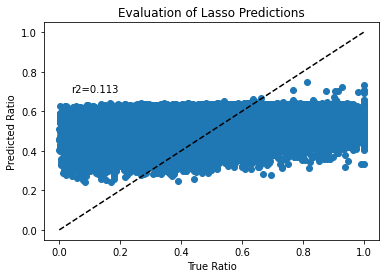

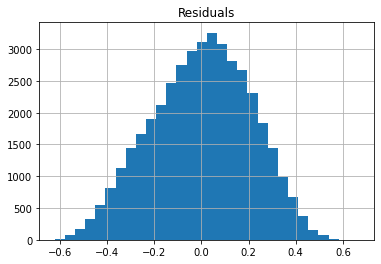

Ridge
train mse: 0.04685
train rmse: 0.21645
train r2: 0.06307517109741856

test mse: 0.04659
test rmse: 0.21585
test r2: 0.0645288822556952

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53159
dtype: float64
Average completion ratio test:  0    0.516
dtype: float64
Average completion ratio pred:  0    0.52384
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


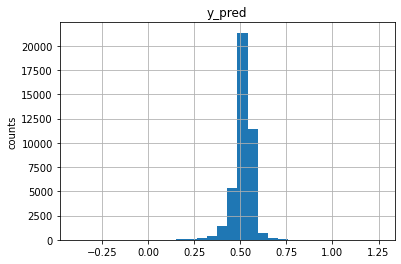

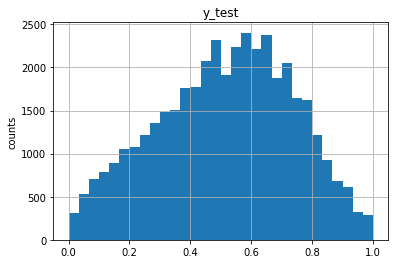

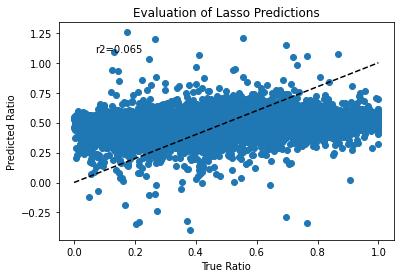

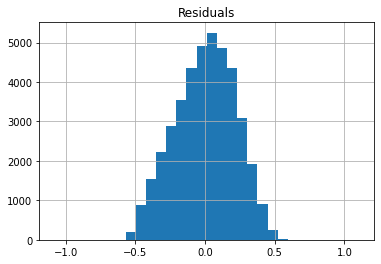

Model  X_train_qt_nc_fs
RandomForestRegressor
train mse: 0.95687
train rmse: 0.9782
train r2: 0.12556525153701126

test mse: 0.975
test rmse: 0.98742
test r2: 0.10494839564068947

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.01245
dtype: float64
Average completion ratio pred:  0    0.00682
dtype: float64


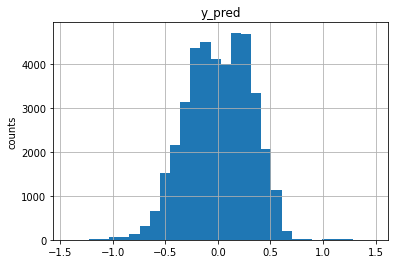

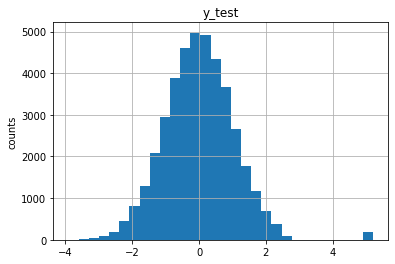

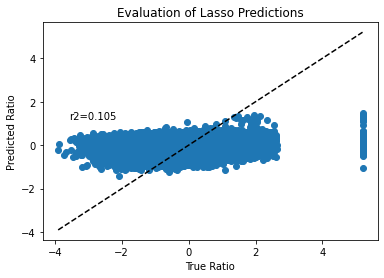

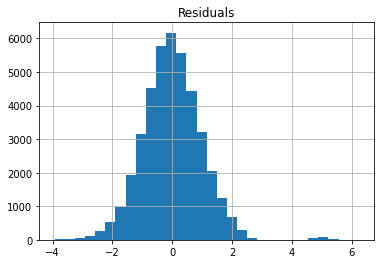

Ridge
train mse: 1.03211
train rmse: 1.01593
train r2: 0.05681113354170697

test mse: 1.02631
test rmse: 1.01307
test r2: 0.057842225324631014

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04671
dtype: float64
Average completion ratio pred:  0    0.0081
dtype: float64


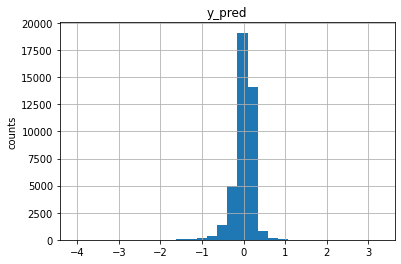

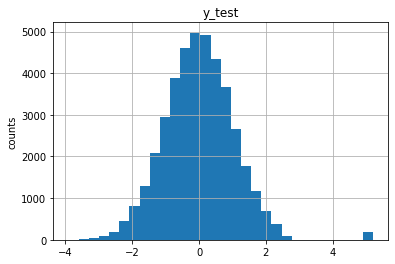

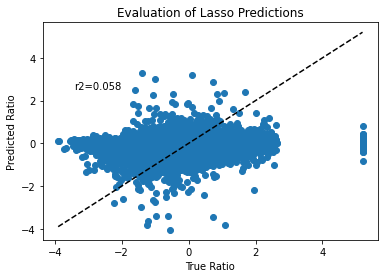

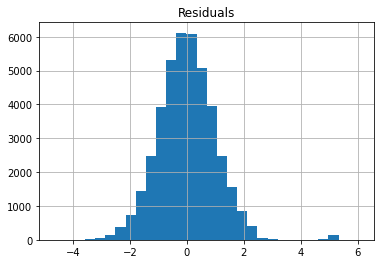

Model  X_train_dr_qt_nc_fs
RandomForestRegressor
train mse: 0.95815
train rmse: 0.97885
train r2: 0.12439371184783943

test mse: 0.97445
test rmse: 0.98714
test r2: 0.10545574277835335

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.01493
dtype: float64
Average completion ratio pred:  0    0.00683
dtype: float64


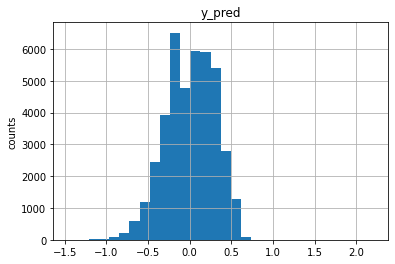

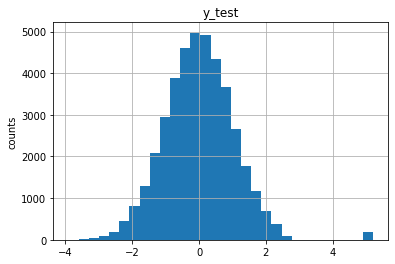

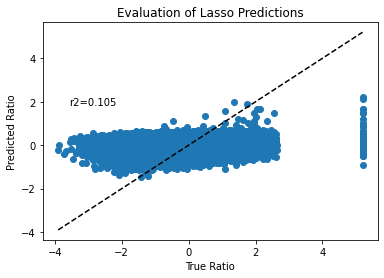

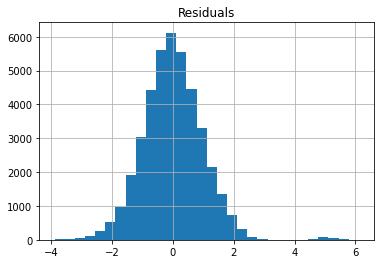

Ridge
train mse: 1.03211
train rmse: 1.01593
train r2: 0.05681113354170697

test mse: 1.02631
test rmse: 1.01307
test r2: 0.057842225324631014

Average completion ratio train:  -0.00125
Average completion ratio test:  0    0.00253
dtype: float64
Average completion ratio test:  0    0.01016
dtype: float64
Average completion ratio pred:  0    0.04671
dtype: float64
Average completion ratio pred:  0    0.0081
dtype: float64


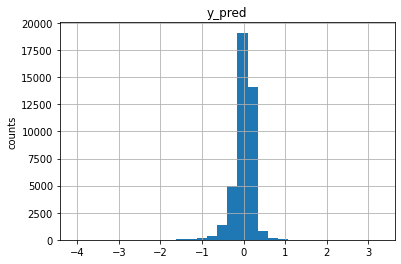

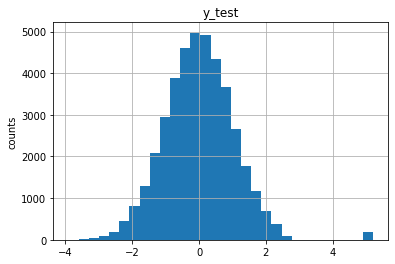

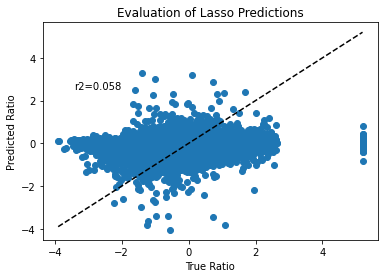

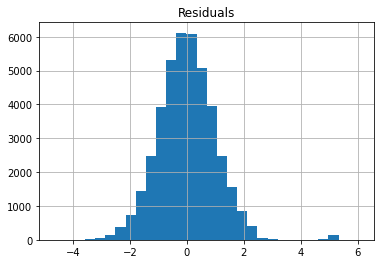

In [27]:

random_forest = RandomForestRegressor(
    max_depth=12, max_features=8, n_estimators= 16)
ridge_regr = Ridge(alpha=1.0)

models_list = pickle.load(open('../data/models_list.pkl','rb'))
print(models_list)
for k in models_list:
    if k.find('train')>-1:
        k_test = k.replace('train','test')
        X_train = pd.read_csv('../data/'+k+'.csv')
        X_test = pd.read_csv('../data/'+k_test+'.csv')
        y_train = X_train.loc[:,'completion_ratio'].copy()
        y_test = X_test.loc[:,'completion_ratio'].copy()
        features = [ col for col in X_train.columns if col != 'completion_ratio']
        X_train = X_train.loc[:,features].copy()
        X_test = X_test.loc[:,features].copy()
        print("Model ",k)
        
        print(random_forest.__class__.__name__)
        random_forest.fit(X_train, y_train)
        evaluation(random_forest, X_train, y_train, X_test, y_test)
        
        print(ridge_regr.__class__.__name__)
        ridge_regr.fit(X_train, y_train)
        evaluation(ridge_regr, X_train, y_train, X_test, y_test)
        

In [ ]:

random_forest = RandomForestRegressor(
    max_depth=16, max_features=8, n_estimators= 16)
ridge_regr = Ridge(alpha=1.0)

models_list = pickle.load(open('../data/models_list.pkl','rb'))
print(models_list)
for k in models_list:
    if k.find('train')>-1:
        k_test = k.replace('train','test')
        X_train = pd.read_csv('../data/'+k+'.csv')
        X_test = pd.read_csv('../data/'+k_test+'.csv')
        y_train = X_train.loc[:,'completion_ratio'].copy()
        y_test = X_test.loc[:,'completion_ratio'].copy()
        features = [ col for col in X_train.columns if col != 'completion_ratio']
        X_train = X_train.loc[:,features].copy()
        X_test = X_test.loc[:,features].copy()
        print("Model ",k)
        
        print(random_forest.__class__.__name__)
        random_forest.fit(X_train, y_train)
        evaluation(random_forest, X_train, y_train, X_test, y_test)
        
        print(ridge_regr.__class__.__name__)
        ridge_regr.fit(X_train, y_train)
        evaluation(ridge_regr, X_train, y_train, X_test, y_test)
        

## New goal: Overfit the training set

In [47]:
def get_dataset():
    df = pd.read_csv('../data/completion_rate.csv')
    df['completion_ratio'] = df['submissions']/df['views']
    selected_columns = list(df.columns)
    selected_columns.pop(selected_columns.index('form_id'))
    selected_columns.pop(selected_columns.index('views'))
    selected_columns.pop(selected_columns.index('submissions'))
    df = df.loc[:,selected_columns]
    target_name = 'completion_ratio'
    features = list(df.columns)
    _  = features.pop(features.index(target_name))
    df = df.sample(frac=0.05)
    X_train, X_test, y_train, y_test = train_test_split(
        df,
        df['completion_ratio'],
        test_size=0.2,
        random_state=7,
    )  

    X_train = X_train.copy()
    X_test = X_test.copy()
    return X_train, X_test

Model  RandomForestRegressor 

train mse: 0.03671
train rmse: 0.1916
train r2: 0.26177119594502685

test mse: 0.04419
test rmse: 0.21022
test r2: 0.11735684588613748

Average completion ratio train:  0.53191
Average completion ratio test:  0    0.53307
dtype: float64
Average completion ratio test:  0    0.51758
dtype: float64
Average completion ratio pred:  0    0.51571
dtype: float64
Average completion ratio pred:  0    0.51549
dtype: float64


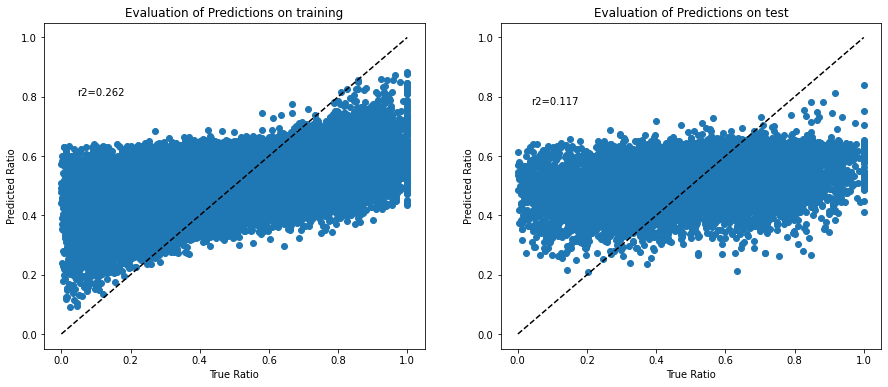

time:  1 s


RandomForestRegressor(max_depth=16, max_features=8, n_estimators=16)

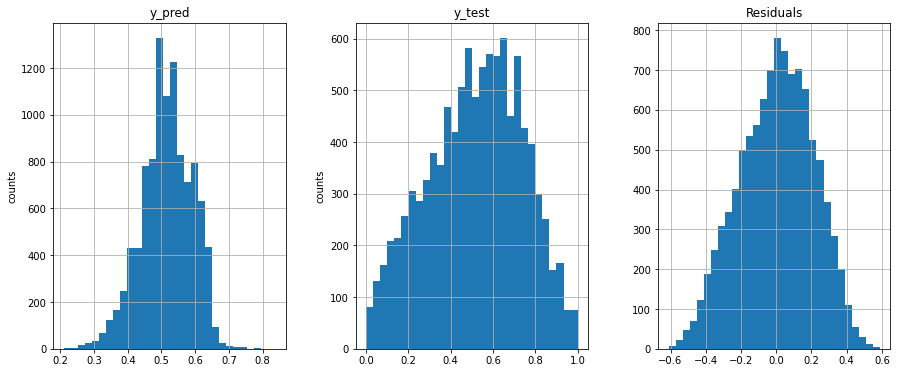

In [51]:
evaluate_model(
    RandomForestRegressor(
        max_depth=16, max_features=8, n_estimators= 16
    )
)

Model  RandomForestRegressor 

train mse: 0.02225
train rmse: 0.14918
train r2: 0.5560036272444501

test mse: 0.04816
test rmse: 0.21946
test r2: 0.029232782112383005

Average completion ratio train:  0.53333
Average completion ratio test:  0    0.53394
dtype: float64
Average completion ratio test:  0    0.51846
dtype: float64
Average completion ratio pred:  0    0.51769
dtype: float64
Average completion ratio pred:  0    0.51587
dtype: float64


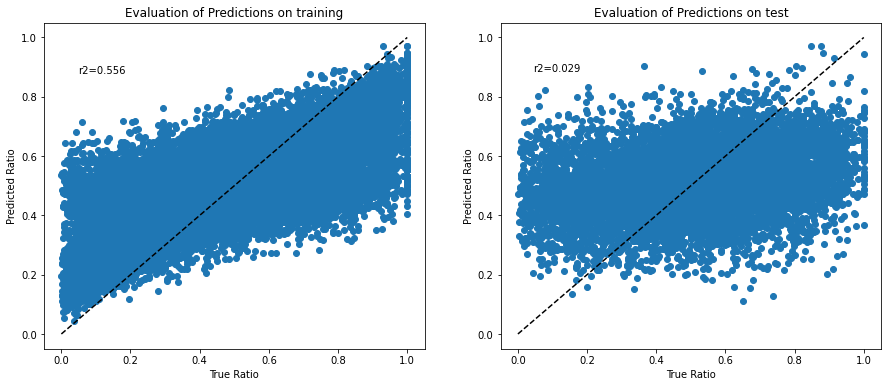

time:  5 s


RandomForestRegressor(max_depth=48, max_features=32, n_estimators=32)

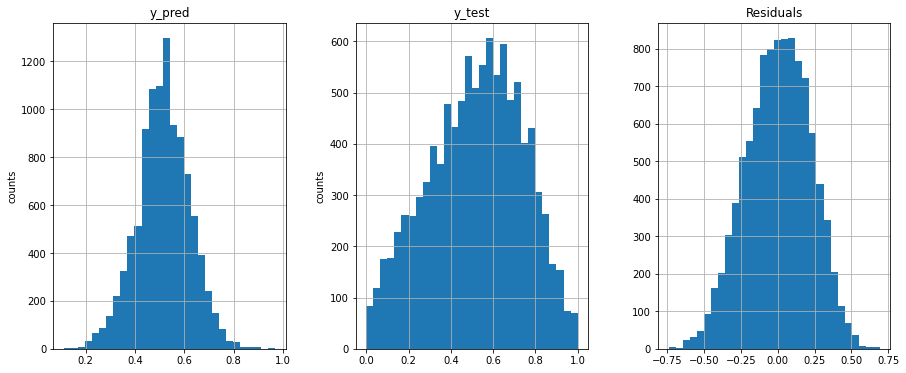

In [52]:
evaluate_model(
    RandomForestRegressor(
        max_depth=48, max_features=32, n_estimators= 32
    )
)

Model  RandomForestRegressor 

train mse: 0.02229
train rmse: 0.14929
train r2: 0.5545254408662413

test mse: 0.04859
test rmse: 0.22044
test r2: 0.02706751336612756

Average completion ratio train:  0.53125
Average completion ratio test:  0    0.53125
dtype: float64
Average completion ratio test:  0    0.51675
dtype: float64
Average completion ratio pred:  0    0.51903
dtype: float64
Average completion ratio pred:  0    0.51509
dtype: float64


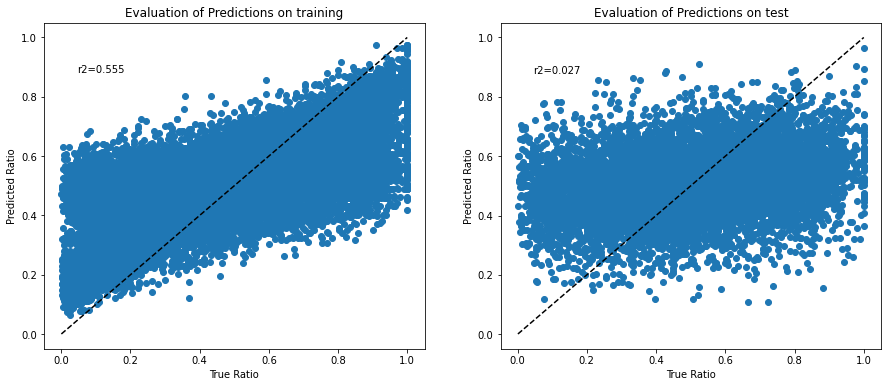

time:  9 s


RandomForestRegressor(max_depth=47, max_features=47, n_estimators=47)

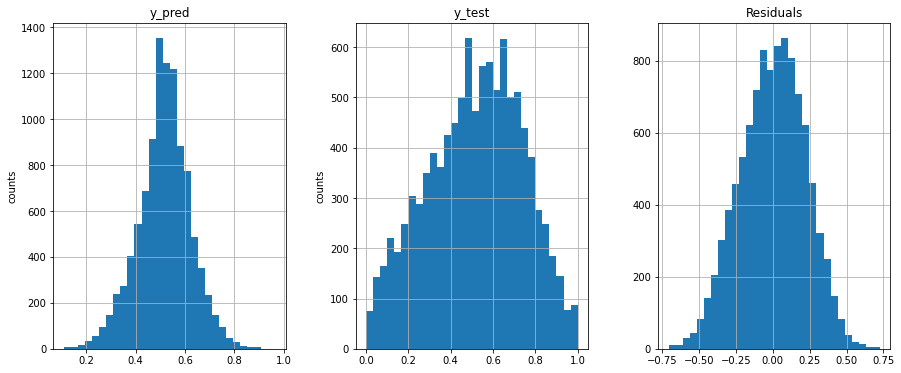

In [53]:
evaluate_model(
    RandomForestRegressor(
        max_depth=47, max_features=47, n_estimators= 47
    )
)

Model  RandomForestRegressor 

train mse: 0.02223
train rmse: 0.14909
train r2: 0.5559408762587192

test mse: 0.04857
test rmse: 0.22038
test r2: 0.044033565751464

Average completion ratio train:  0.52907
Average completion ratio test:  0    0.52542
dtype: float64
Average completion ratio test:  0    0.51159
dtype: float64
Average completion ratio pred:  0    0.51531
dtype: float64
Average completion ratio pred:  0    0.51344
dtype: float64


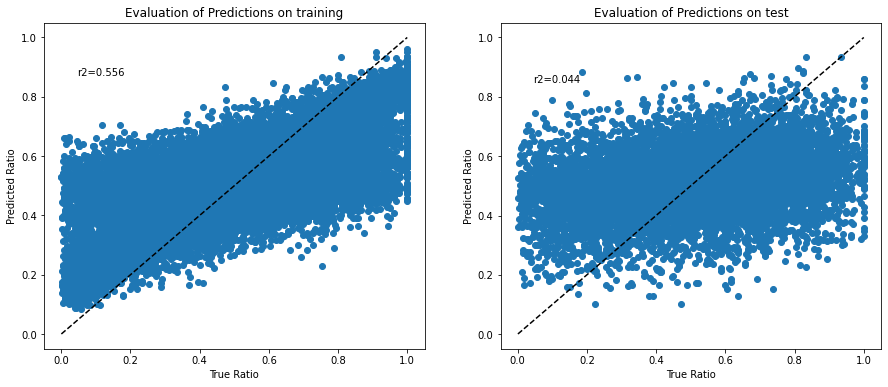

time:  16 s


RandomForestRegressor(max_depth=47, max_features=47, n_estimators=80)

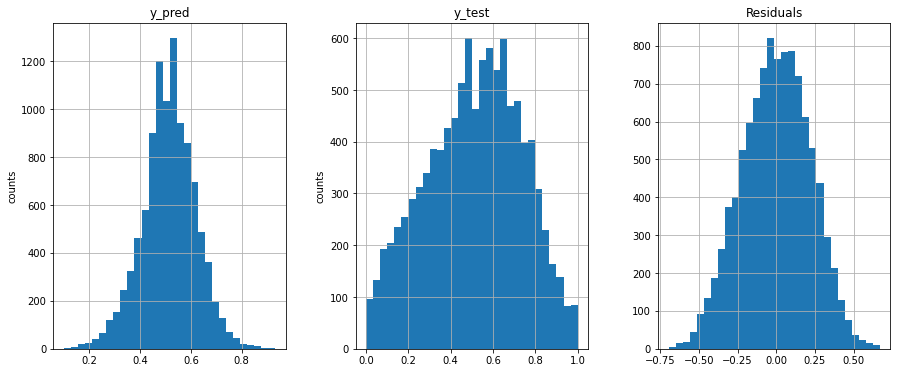

In [54]:
evaluate_model(
    RandomForestRegressor(
        max_depth=47, max_features=47, n_estimators=80
    )
)

Model  Ridge 

train mse: 0.04693
train rmse: 0.21664
train r2: 0.06342868979292304

test mse: 0.04743
test rmse: 0.21777
test r2: 0.05004466337528335

Average completion ratio train:  0.53061
Average completion ratio test:  0    0.53333
dtype: float64
Average completion ratio test:  0    0.51535
dtype: float64
Average completion ratio pred:  0    0.52444
dtype: float64
Average completion ratio pred:  0    0.51579
dtype: float64


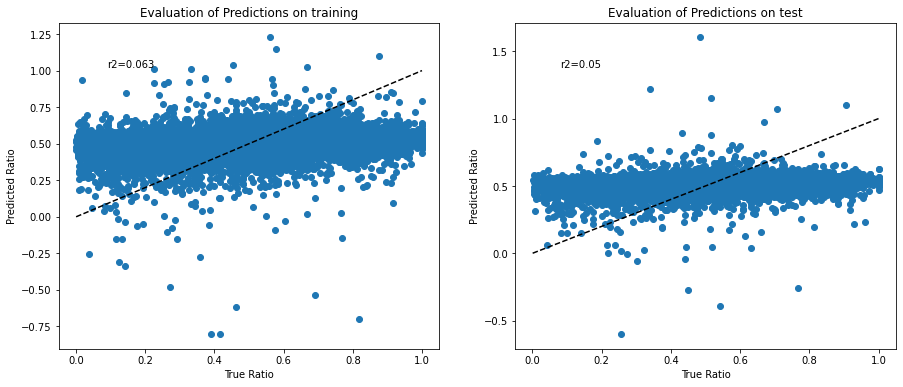

time:  1 s


Ridge()

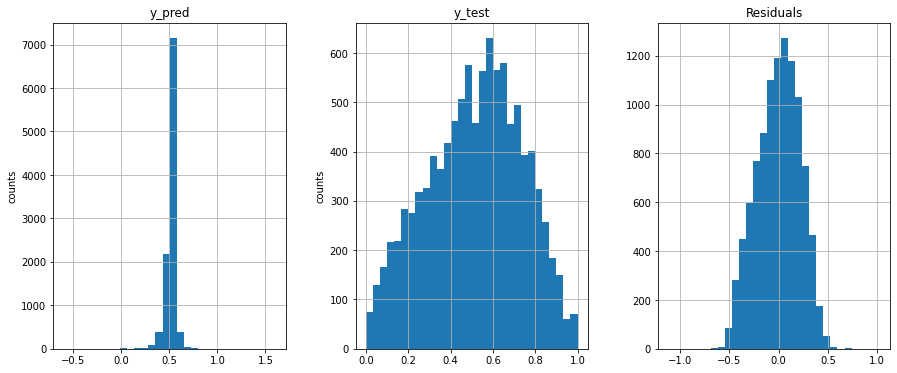

In [55]:
evaluate_model(
    Ridge(alpha=1.0)
)

Model  Ridge 

train mse: 0.04699
train rmse: 0.21676
train r2: 0.05948118553794857

test mse: 0.04708
test rmse: 0.21699
test r2: 0.05616999119185151

Average completion ratio train:  0.53047
Average completion ratio test:  0    0.52778
dtype: float64
Average completion ratio test:  0    0.51422
dtype: float64
Average completion ratio pred:  0    0.52383
dtype: float64
Average completion ratio pred:  0    0.51543
dtype: float64


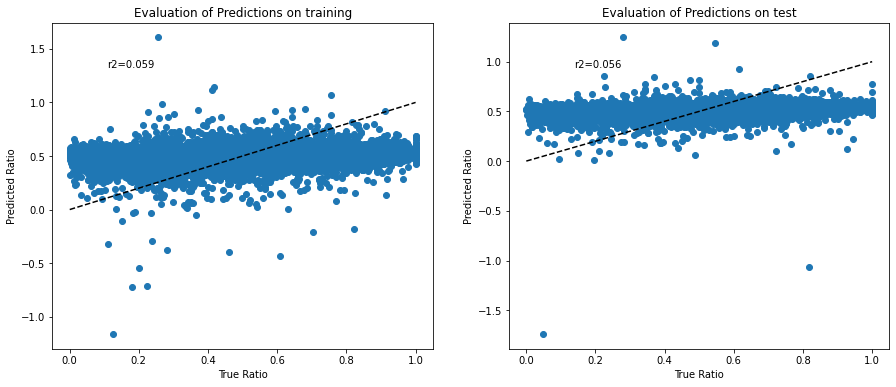

time:  1 s


Ridge(alpha=0.01)

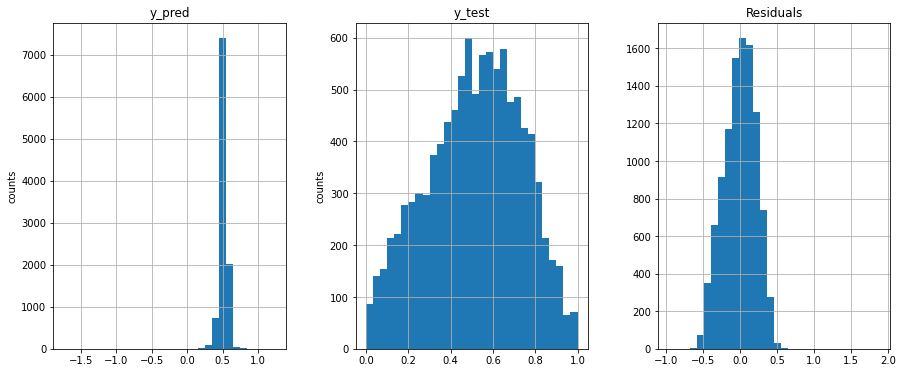

In [56]:
evaluate_model(
    Ridge(alpha=0.01)
)

Model  Ridge 

train mse: 0.04617
train rmse: 0.21487
train r2: 0.0680888040839468

test mse: 0.04671
test rmse: 0.21612
test r2: 0.06438199997976979

Average completion ratio train:  0.52964
Average completion ratio test:  0    0.53086
dtype: float64
Average completion ratio test:  0    0.51507
dtype: float64
Average completion ratio pred:  0    0.52464
dtype: float64
Average completion ratio pred:  0    0.51537
dtype: float64


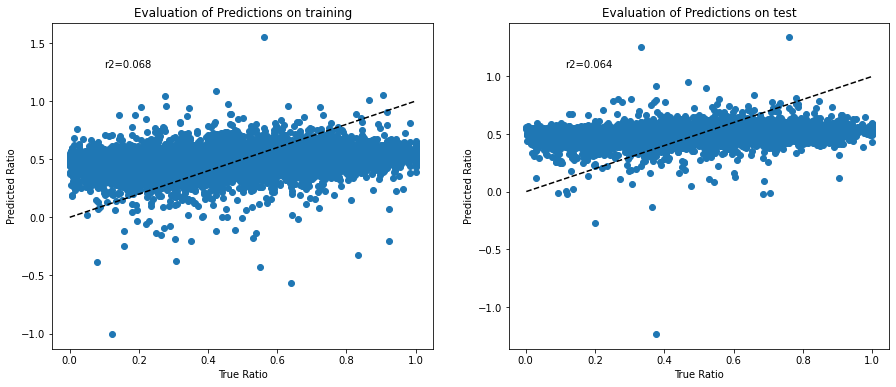

time:  0 s


Ridge(alpha=1e-06)

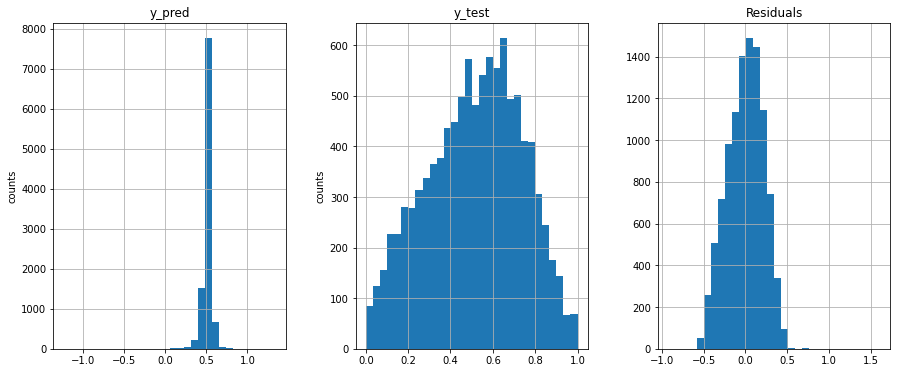

In [57]:
evaluate_model(
    Ridge(alpha=0.000001)
)

Model  Lasso 



/media/disk/home/pau/Projectes/typeform_test/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 836.4301990118734, tolerance: 0.2049334686359651
  positive)


train mse: 0.0466
train rmse: 0.21588
train r2: 0.06191122373112623

test mse: 0.04666
test rmse: 0.21601
test r2: 0.06400727161606623

Average completion ratio train:  0.53165
Average completion ratio test:  0    0.52727
dtype: float64
Average completion ratio test:  0    0.51318
dtype: float64
Average completion ratio pred:  0    0.52313
dtype: float64
Average completion ratio pred:  0    0.5159
dtype: float64


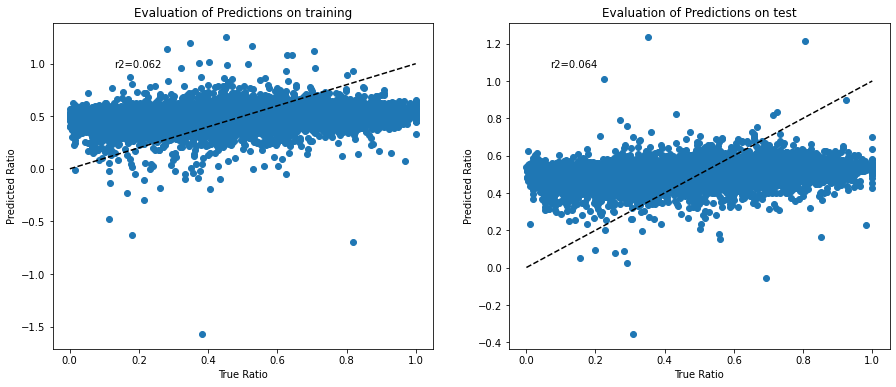

time:  2 s


Lasso(alpha=1e-06, random_state=7)

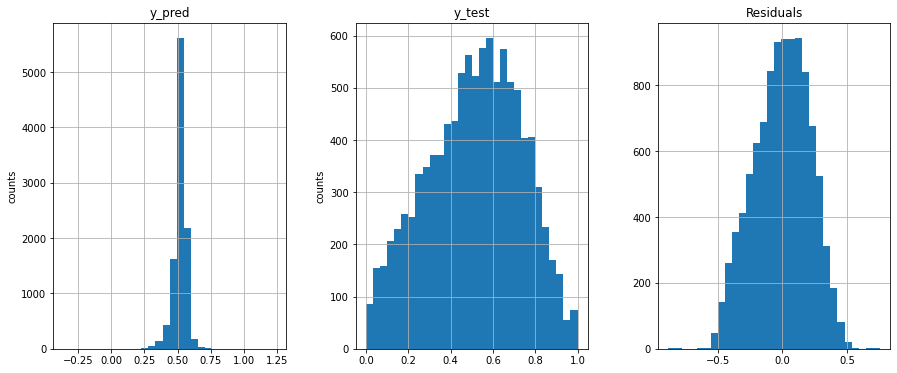

In [58]:
evaluate_model(
    Lasso(alpha=0.000001, random_state=7)
)

Model  Lasso 



/media/disk/home/pau/Projectes/typeform_test/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 964.4345297182394, tolerance: 0.2065266536825114
  positive)


train mse: 0.04676
train rmse: 0.21624
train r2: 0.066043522504448

test mse: 0.04644
test rmse: 0.21551
test r2: 0.06411135130196499

Average completion ratio train:  0.52818
Average completion ratio test:  0    0.53333
dtype: float64
Average completion ratio test:  0    0.51733
dtype: float64
Average completion ratio pred:  0    0.52219
dtype: float64
Average completion ratio pred:  0    0.51352
dtype: float64


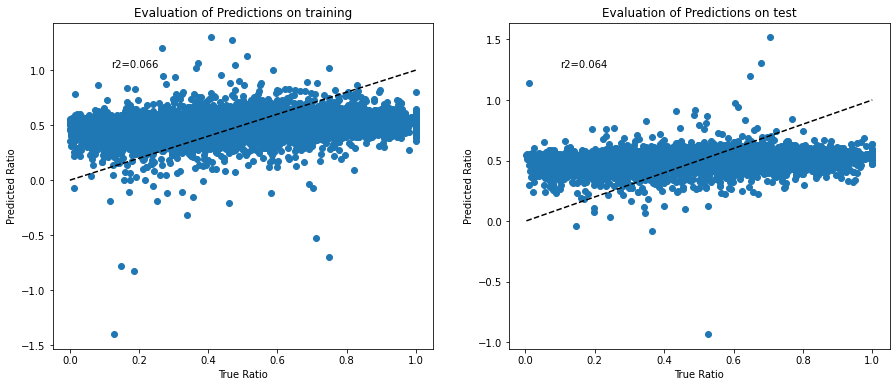

time:  2 s


Lasso(alpha=1e-15, random_state=7)

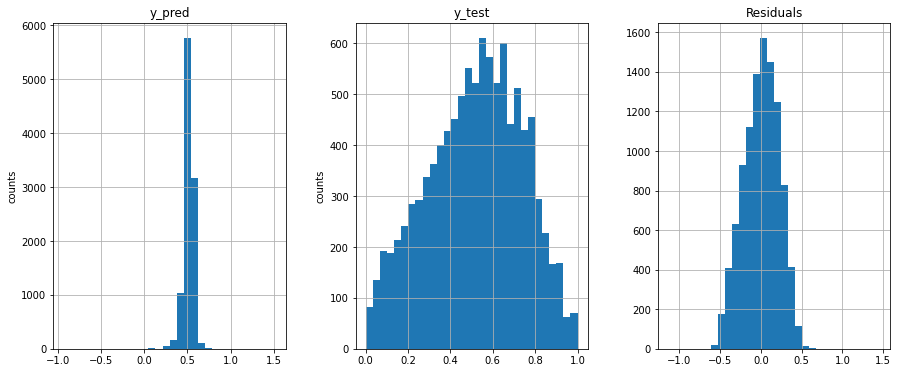

In [59]:
evaluate_model(
    Lasso(alpha=0.000000000000001, random_state=7)
)

Model  Lasso 

train mse: 0.05006
train rmse: 0.22375
train r2: 0.0

test mse: 0.05019
test rmse: 0.22404
test r2: -0.0001060546016422581

Average completion ratio train:  0.53125
Average completion ratio test:  0    0.53425
dtype: float64
Average completion ratio test:  0    0.51759
dtype: float64
Average completion ratio pred:  0    0.51528
dtype: float64
Average completion ratio pred:  0    0.51528
dtype: float64


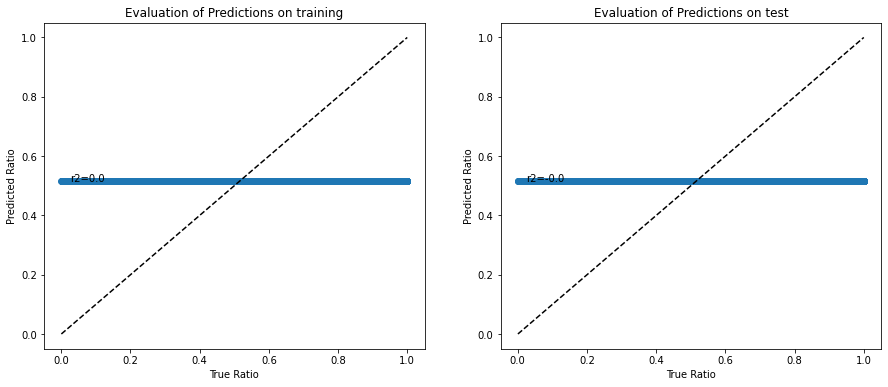

time:  0 s


Lasso(alpha=100, random_state=7)

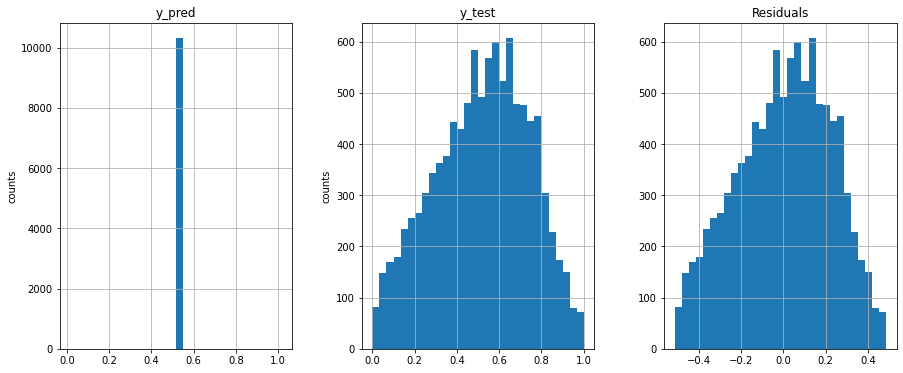

In [60]:
evaluate_model(
    Lasso(alpha=100, random_state=7)
)

Model  Lasso 



/media/disk/home/pau/Projectes/typeform_test/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 902.5115240220172, tolerance: 0.2048284754788776
  positive)


train mse: 0.04648
train rmse: 0.21559
train r2: 0.06392173670971657

test mse: 0.0459
test rmse: 0.21424
test r2: 0.06285235783201415

Average completion ratio train:  0.52941
Average completion ratio test:  0    0.52747
dtype: float64
Average completion ratio test:  0    0.51277
dtype: float64
Average completion ratio pred:  0    0.52454
dtype: float64
Average completion ratio pred:  0    0.51542
dtype: float64


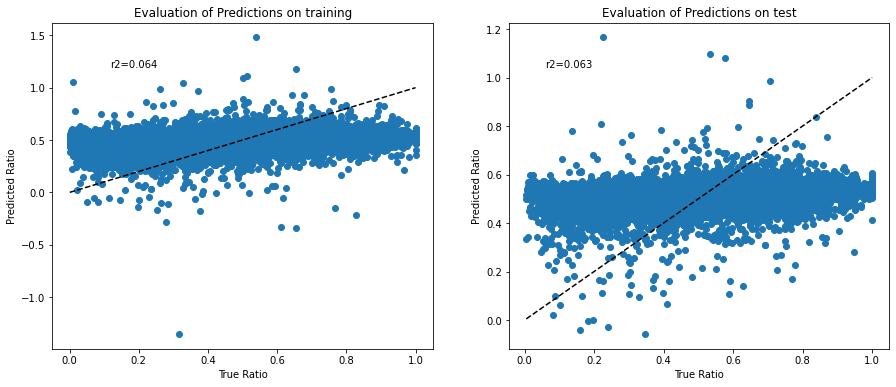

time:  2 s


Lasso(alpha=1e-06, random_state=7)

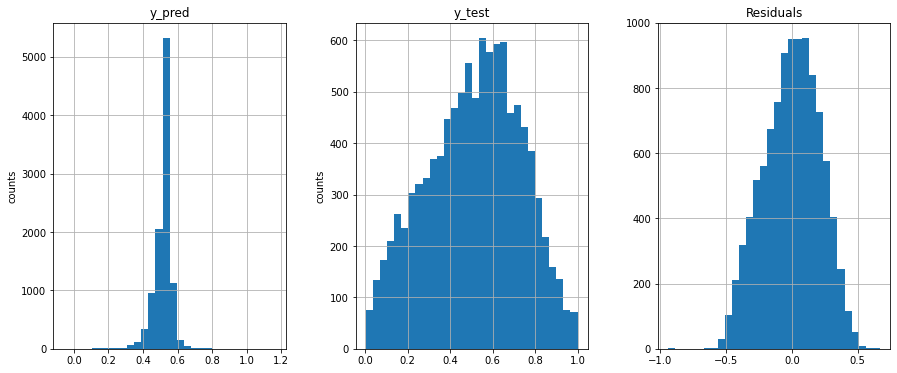

In [67]:
evaluate_model(
    Lasso(alpha=0.000001, random_state=7)
)